# Games market trends analysis 

We have data on games market for 2016. More precisely it is information on user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales.  

The goal of this research is to indetify patterns determine whether a game succeeds or not. The result of this study  will allow Ice to spot potential big winners and plan advertising campaigns.


## Step 1: Studying general information

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels as st
from scipy.stats import mannwhitneyu
from IPython.display import display
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")


In [2]:
# importing dataset

try:
    games = pd.read_csv('/Users/pavellugovoy/Desktop/data_analysis/integrated project/datasets/games.csv')

except: 
    games = pd.read_csv('/datasets/games.csv')


In [3]:
# looking at the general information

display(games.head(10))
display(games.tail(10))
display(games.sample())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14687,Race Driver 2006,PSP,2006.0,Racing,0.03,0.0,0.0,0.0,81.0,8.5,T


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# finding the number and percentage of missing values 
report = games.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / games.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Critic_Score,8578,0.51
Rating,6766,0.40
User_Score,6701,0.40
Year_of_Release,269,0.02
Name,2,0.00
Genre,2,0.00
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


### Conclusion

We have a dataset with 16715 entries containg the information on: 

1. Game's name ('Name');
2. Platform on which this game is released ('Platform');
3. Year of game's release ('Year_of_Release');
4. Games' genre ('Genre');
5. North American sales in USD million ('NA_sales');
6. Sales in Europe in USD million ('EU_sales');
7. Sales in Japan in USD million ('JP_sales');
8. Sales in other countries in USD million ('Other_sales');
9. Critics' score (maximun of 100) ('Critic_Score');
10. Users's score (maximum of 10) ('User_Score'); 
11. ESRB's rating ('Rating').

The first look at the dataset let us conclude that not everything is fine with the data values: 

1. Missing values. 

There are many null values more precisely in the columns related to:
- game's name ('Name'), there are two rows with missing values;
- year of game's release ('Year_of_Release'), there are 269 rows with missing values (2%);
- games' genre ('Genre'), there are two rows with missing values;
- critics' score ('Critic_Score'), there are 8578 rows with missing values (51%);
- user's score ('User_Score'), there are 6701 rows with missing values (40%);
- ESRB's rating ('Rating'), there are 6766 rows with missing values (40%). 


2. Wrong data types. 

There are values with data types which do not correspond to the nature of these values: 

- values related to the year of game's release ('Year_of_Release') are of float type, while they are due to their nature should be of integer type;
- values related to the critic's score ('Critic_Score') are of float type, but there seem to be  only integers in the scale, so it may be convinient to convert them to integer in order to simplify the operations and readability;
- values related to users's score are of 'object' type, while these values are scores, i.e. numbers, so it seems necessary to convert them to 'float' type while there are values of float type.

3. Other issues. 

We see that there may be other issues with the data, such as we that within the values relate to user's score there are values as 'tbd' which seem to be missing. 

Also we noticed that some of the name of the columns contain capital letters, which is not very convinient for further use, so they should be replaced with the names without capital letters.


## Step 2: Data preprocessing 

In [7]:
# replacing the column names with capital letters 
# with the uppercase letters 

games.columns = games.columns.str.lower()

# checking the results
games.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Processing missing values 

In [8]:
# processing 'name' values

# looking for any other issues
display(games['name'].value_counts())
print('Number of unique names:', len(games['name'].value_counts()))

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

Number of unique names: 11559


In [9]:
# looking at the rows with NA values

games[games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# the data is totally corrupted, we cannot restore it, so we drop it out

games.dropna(subset=['name'], inplace=True)

# checking the results
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### checking if there any issues with the other columns

In [11]:
# checking 'platform'

display(games['platform'].unique())
display(games['platform'].value_counts())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

#### 'platform' is checked, everything seems to be fine

In [12]:
# checking 'genre'
print('Number of null values in "genre":', 
      games['genre'].isna().sum())
display(games['genre'].unique())
display(games['genre'].value_counts())

Number of null values in "genre": 0


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

#### 'genre' is checked, everything seems to be fine

In [13]:
# checking 'rating'
print('Number of null values in "rating":', 
      games['rating'].isna().sum())
display(games['rating'].unique())
display(games['rating'].value_counts())

Number of null values in "rating": 6764


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [14]:
# looking at the rows with missing values in 'rating'

games[games.rating.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


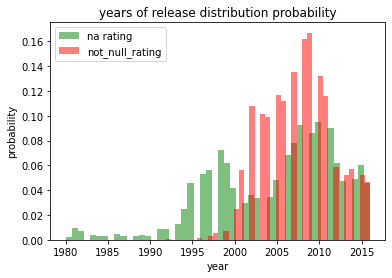

In [15]:
# checking if a dependence between null values in 'rating' 
# and the year of release

na_rating_years = games[games.rating.isna()]['year_of_release']
notnull_rating_years = games[games.rating.notnull()]['year_of_release']

kwargs = dict(alpha=0.5, bins=50, density=True)

plt.hist(na_rating_years, **kwargs, color ='g', label ='na rating')
plt.hist(notnull_rating_years, **kwargs, color = 'r', label = 'not_null_rating')
plt.gca().set(title = 'years of release distribution probability', ylabel = 'probability', xlabel ='year')
plt.legend()
plt.show()

In [16]:
# checking the  rows with missing values in column 'rating' 
# for the games released before and after  after 2000

print('Number of games released before 2000 with null rating values:',
len(games[games.rating.isnull()].query ('year_of_release <= 2000')))
print('Number of games released before 2000 with non-null rating values:',
len(games[games.rating.notnull()].query ('year_of_release <= 2000')))

print()

print('Number of games released after 2000 with null rating values:',
len(games[games.rating.isnull()].query ('year_of_release > 2000')))
print('Number of games released after 2000 with non-null rating values:',
len(games[games.rating.notnull()].query ('year_of_release > 2000')))

Number of games released before 2000 with null rating values: 2071
Number of games released before 2000 with non-null rating values: 253

Number of games released after 2000 with null rating values: 4605
Number of games released after 2000 with non-null rating values: 9515


#### Almost all rows with the games released before 2000 have missing values in the column 'rating, but they are also missing values in the rows related to the games released after after 2000.  The rating values  are categorical and the are missing completely at random, so we cannot restore them by other values to restore them we need additional data

In [17]:
# checking 'na_sales'

display(games['na_sales'].value_counts())
display(games['na_sales'].unique())

0.00     4507
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: na_sales, Length: 402, dtype: int64

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

In [18]:
# looking at the rows with 0 values in 'na_sales' 
# (checking if there is a dependence with other values)
display(games[games.na_sales == 0].head())
display(games[games.na_sales == 0].sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8470,PoPoLoCrois: Hajimari no Bouken,PS2,2002.0,Role-Playing,0.0,0.0,0.16,0.0,NaN,NaN,NaN
12239,Bleach: Hanatareshi Yabou,PS2,2006.0,Role-Playing,0.0,0.0,0.07,0.0,NaN,NaN,NaN
10714,Lord of Apocalypse,PSP,2011.0,Role-Playing,0.0,0.0,0.10,0.0,NaN,NaN,NaN
7324,Magician's Quest: Town of Magic,3DS,2012.0,Simulation,0.0,0.0,0.21,0.0,NaN,NaN,NaN
7491,Jikkyou Powerful Pro Yakyuu 2012,PS3,2012.0,Action,0.0,0.0,0.21,0.0,NaN,NaN,NaN
8011,Super Robot Taisen J,GBA,2005.0,Strategy,0.0,0.0,0.18,0.0,NaN,NaN,NaN
14488,Puzzle & Action: Tant-R,GEN,1994.0,Misc,0.0,0.0,0.03,0.0,NaN,NaN,NaN
11834,Mega Man Xtreme,GB,2000.0,Platform,0.0,0.0,0.07,0.0,NaN,NaN,NaN
12646,Tabi no Yubisashi Kaiwachou DS: DS Series 3 Ka...,DS,2006.0,Misc,0.0,0.0,0.06,0.0,NaN,NaN,NaN
3687,Gekikuukan Pro Yakyuu: At the End of the Centu...,PS2,2000.0,Sports,0.0,0.0,0.54,0.0,NaN,NaN,NaN


#### 'na_sales' is checked, everything seems to be fine except missing values, they may be explained by inaccurate data collection there are many 0 values in this column, but we cannot say that they are mising values, they seem to be the real

In [19]:
# checking 'eu_sales'
display(games['eu_sales'].value_counts())
display(games['eu_sales'].unique())


0.00     5869
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: eu_sales, Length: 307, dtype: int64

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

In [20]:
# looking at the rows with 0 values in 'eu_sales' 
# (checking if there is a dependence with other values)
display(games[games.eu_sales == 0].head())
display(games[games.eu_sales == 0].sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
148,Final Fantasy XII,PS2,2006.0,Role-Playing,1.88,0.0,2.33,1.74,92.0,7.6,T
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.00,0.0,4.87,0.00,NaN,NaN,NaN
268,Metal Gear Solid 3: Snake Eater,PS2,2004.0,Action,1.46,0.0,0.83,1.93,91.0,9.3,M
284,Half-Life,PC,1997.0,Shooter,4.03,0.0,0.09,0.00,96.0,9.1,M
316,Dragon Warrior III,NES,1988.0,Role-Playing,0.10,0.0,3.77,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14021,Monster Hunter Frontier Online: Season 9.0,X360,2010.0,Role-Playing,0.00,0.0,0.04,0.00,NaN,NaN,NaN
15261,Castlevania: Lords of Shadow - Reverie,X360,2011.0,Action,0.02,0.0,0.00,0.00,NaN,NaN,NaN
14105,Half-Minute Hero 2,PSP,NaN,Role-Playing,0.00,0.0,0.04,0.00,NaN,NaN,NaN
4895,Are You Smarter than a 5th Grader? Make the Grade,DS,2008.0,Misc,0.36,0.0,0.00,0.03,NaN,tbd,E
12173,Nichibeikan Pro Yakyuu: Final League,PS2,2002.0,Sports,0.00,0.0,0.07,0.00,NaN,NaN,NaN
15709,Koisuru Otome to Shugo no Tate Portable,PSP,2010.0,Adventure,0.00,0.0,0.02,0.00,NaN,NaN,NaN
16634,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011.0,Puzzle,0.01,0.0,0.00,0.00,NaN,NaN,NaN
15919,Oshiri Kajiri Mushi no Rhythm Lesson DS: Kawai...,DS,2008.0,Misc,0.00,0.0,0.02,0.00,NaN,NaN,NaN
3407,Tales of Rebirth,PS2,2004.0,Role-Playing,0.00,0.0,0.59,0.00,NaN,NaN,NaN
13282,Capcom vs. SNK: Millennium Fight 2000 Pro,DC,2001.0,Fighting,0.00,0.0,0.05,0.00,NaN,NaN,NaN


#### the 'eu_sales' is checked, everything seems to be fine except missing values, they may be explained by inaccurate data collection. There are many 0 values in this column, but we cannot say that they are mising values, they seem to be the real

In [21]:
# checking 'jp_sales'
display(games['jp_sales'].value_counts())
display(games['jp_sales'].unique())

0.00    10513
0.02      741
0.01      706
0.03      545
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: jp_sales, Length: 244, dtype: int64

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

In [22]:
# looking at the rows with 0 values in 'jp_sales' 
# (checking if there is a dependence with other values)
display(games[games.jp_sales == 0].head())
display(games[games.jp_sales == 0].sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
61,Just Dance 3,Wii,2011.0,Misc,5.95,3.11,0.0,1.06,74.0,7.8,E10+
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.0,0.08,NaN,NaN,NaN
100,Call of Duty: World at War,X360,2008.0,Shooter,4.81,1.88,0.0,0.69,84.0,7.6,M
103,Just Dance,Wii,2009.0,Misc,3.48,2.99,0.0,0.73,49.0,8,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6749,TV Superstars,PS3,2010.0,Misc,0.07,0.12,0.0,0.05,56.0,4.9,E
9316,Monster Jam,DS,2007.0,Racing,0.12,0.00,0.0,0.01,NaN,tbd,E
1398,Toy Story 3: The Video Game,Wii,2010.0,Action,0.63,0.62,0.0,0.14,NaN,NaN,NaN
11328,Bomberman Jetters,GC,2002.0,Puzzle,0.06,0.02,0.0,0.00,70.0,7.9,E
11746,Medal of Honor: Underground,GBA,2002.0,Shooter,0.05,0.02,0.0,0.00,46.0,1.7,T
13130,Second Sight,GC,2004.0,Adventure,0.04,0.01,0.0,0.00,77.0,8.5,T
12592,Showtime Championship Boxing,DS,2007.0,Fighting,0.06,0.00,0.0,0.00,33.0,tbd,E10+
10925,Teenage Mutant Ninja Turtles: Mutants in Manha...,PS4,2016.0,Action,0.05,0.02,0.0,0.02,44.0,5.5,T
12277,Hot Wheels: Burnin' Rubber,GBA,2001.0,Racing,0.05,0.02,0.0,0.00,66.0,tbd,E
5015,Dora The Explorer: Dora Saves the Snow Princess,PS2,2008.0,Platform,0.19,0.15,0.0,0.05,NaN,tbd,E


#### the 'jp_sales' is checked, everything seems to be fine except missing values,  they may be explained by inaccurate data collection. There are many 0 values in this column, but we cannot say that they are mising values, they seem to be the real

In [23]:
# checking 'other_sales'
display(games['other_sales'].value_counts())
display(games['other_sales'].unique())

0.00    6600
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: other_sales, Length: 155, dtype: int64

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

#### The 'other_sales' is checked, everything seems to be fine . There are many 0 values in this column, but we cannot say that they are mising values,  they seem to be the real

In [24]:
# checking 'year_of_release'
display(games['year_of_release'].unique())
display(games['year_of_release'].value_counts())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

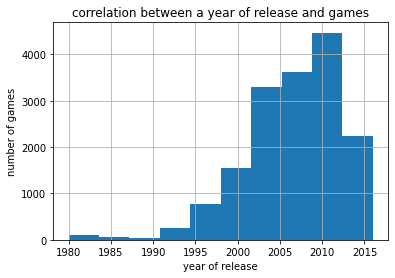

In [25]:
# looking at the distribution of year of release throughout 
# games by plotting a histogram
games['year_of_release'].hist()
plt.title ("correlation between a year of release and games")
plt.suptitle("")
plt.xlabel("year of release")
plt.ylabel("number of games")
plt.show()

In [26]:
# looking at the rows with null values in the column 'year_of_release'

games[games.year_of_release.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


#### There is a peak between 2006 and 2011, then the number of games released per year decreased,  the number of missing values are only 269,  so it's not probable that this decrease is associated with the missing values. A probable reason of missing values is inaccurate data collection, or damaged data 

In [27]:
# checking 'crtitic_score'

display(games['critic_score'].unique())
display(games['critic_score'].value_counts())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: critic_score, Length: 82, dtype: int64

In [28]:
# looking at rows with missing values in 'critic_score'
games[games.critic_score.isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [29]:
# looking for dependence of missing values in 'critic_score' and 'user_score'
games[(games.critic_score.isna()) & (games.user_score.notnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,tbd,M
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A
16688,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,0.01,0.00,0.00,0.00,NaN,tbd,T
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


In [30]:
# looking for dependence of missing values in 'critic_score' and 'rating'
games[(games.critic_score.isna()) & (games.rating.notnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
...,...,...,...,...,...,...,...,...,...,...,...
16678,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A
16688,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,0.01,0.00,0.00,0.00,NaN,tbd,T
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


In [31]:
# checking 'user_score' 
display(games['user_score'].unique())
display(games['user_score'].value_counts())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [32]:
# replacig 'tbd (which are also in fact missing values) with 'np.nan' 
# in order to facilitate further processing 

games['user_score'] = games['user_score'].replace({'tbd':np.nan})

# checking the results

display(games['user_score'].value_counts())
display(games['user_score'].unique())
display(games['user_score'].isna().sum())

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

9123

#### There's no dependence of missing values in 'critic_score', missing values in 'user_score' and missing  values in 'rating'. A probable reason of missing values is inaccurate data collection, or the data was damaged when importing from other sources. This data cannot be restored without additional data 

In [33]:
# importing extra data from external sources

# https://docs.google.com/spreadsheets/d/1HYZmidzNx6tBadFeb0z-p8-82f6eKSRCpdDxz25_ws0/edit?usp=sharing

from io import BytesIO
import requests
spreadsheet_id = '1HYZmidzNx6tBadFeb0z-p8-82f6eKSRCpdDxz25_ws0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
games_extra = pd.read_csv(BytesIO(r.content))

games_extra.head() 


,name,metacritic,user_rating,release_year,esrb_rating
0,D/Generation HD,NaN,0.0,2015.0,E10+
1,G Prime Into The Rain,NaN,0.0,2016.0,E
2,Land Sliders,NaN,0.0,2015.0,E10+
3,Pixel Gear,NaN,0.0,2016.0,T
4,Gods and Idols,NaN,0.0,2016.0,NaN


In [34]:
games_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          474415 non-null  object 
 1   metacritic    4733 non-null    float64
 2   user_rating   474417 non-null  float64
 3   release_year  450218 non-null  float64
 4   esrb_rating   55864 non-null   object 
dtypes: float64(3), object(2)
memory usage: 18.1+ MB


In [35]:
# merging with initial data

games_fin = games.merge(games_extra, on='name', how='left')
games_fin.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,metacritic,user_rating,release_year,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,76.0,4.19,2006.0,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,4.27,1985.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.0,4.26,2008.0,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,80.0,4.17,2009.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# filling in the missing values with the values from extra data 

games_fin['critic_score'] = games_fin['critic_score'].fillna(value=games_fin['metacritic'])

games_fin['user_score'] = games_fin['user_score'].fillna(value=games_fin['user_rating'])

games_fin['year_of_release'] = games_fin['year_of_release'].fillna(value=games_fin['release_year'])

games_fin['rating'] = games_fin['rating'].fillna(value=games_fin['esrb_rating'])


In [37]:
# deleting added columns

games_fin = games_fin.drop(columns=['metacritic', 'user_rating', 'release_year', 'esrb_rating'])

# checking the results

games_fin.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,4.27,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [38]:
# checking there are values of year of release after 2016 
# which may occur due to merging with external source

games_fin[games_fin.year_of_release > 2016]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4436,Super Breakout,2600,2017.0,Puzzle,0.41,0.03,0.0,0.00,NaN,0.0,NaN
4647,TERA,PC,2017.0,Role-Playing,0.25,0.12,0.0,0.05,77.0,6.8,M
5799,Slot Machine,2600,2020.0,Action,0.29,0.02,0.0,0.00,NaN,0.0,NaN
8739,Home Run,2600,2017.0,Sports,0.14,0.01,0.0,0.00,NaN,0.0,NaN
13141,GRID,DS,2019.0,Racing,0.04,0.00,0.0,0.00,79.0,8.1,E
13780,GRID,PC,2019.0,Racing,0.00,0.03,0.0,0.01,87.0,7.9,E


In [39]:
# dropping the rows with 'year_of_release' after 2016

games_fin = games_fin.query('year_of_release <= 2016')

In [40]:
# dropping null values

print('before')
display(games_fin.info())

games_fin = games_fin.dropna().reset_index()

print('after')

games_fin.info()


before
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16616 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16616 non-null  object 
 1   platform         16616 non-null  object 
 2   year_of_release  16616 non-null  float64
 3   genre            16616 non-null  object 
 4   na_sales         16616 non-null  float64
 5   eu_sales         16616 non-null  float64
 6   jp_sales         16616 non-null  float64
 7   other_sales      16616 non-null  float64
 8   critic_score     8447 non-null   float64
 9   user_score       11630 non-null  object 
 10  rating           10397 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

after
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8026 entries, 0 to 8025
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            8026 non-null   int64  
 1   name             8026 non-null   object 
 2   platform         8026 non-null   object 
 3   year_of_release  8026 non-null   float64
 4   genre            8026 non-null   object 
 5   na_sales         8026 non-null   float64
 6   eu_sales         8026 non-null   float64
 7   jp_sales         8026 non-null   float64
 8   other_sales      8026 non-null   float64
 9   critic_score     8026 non-null   float64
 10  user_score       8026 non-null   object 
 11  rating           8026 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 752.6+ KB


In [41]:
# checking once more time 'critic_score' values before converting them to integer
display(games_fin['critic_score'].value_counts())
display(games_fin['critic_score'].unique())

80.0    246
70.0    246
71.0    244
78.0    240
75.0    240
       ... 
99.0      2
21.0      1
17.0      1
22.0      1
13.0      1
Name: critic_score, Length: 83, dtype: int64

array([76., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88., 83.,
       94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92., 71.,
       72., 68., 62., 67., 99., 49., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 40.,
       46., 51., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [42]:
# converting values to relevant datatypes

games_fin['year_of_release'] = games_fin['year_of_release'].astype('int')

games_fin['user_score'] = games_fin['user_score'].astype('float')

games_fin['critic_score'] = games_fin['critic_score'].astype('int')

# checking the results

games_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8026 entries, 0 to 8025
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            8026 non-null   int64  
 1   name             8026 non-null   object 
 2   platform         8026 non-null   object 
 3   year_of_release  8026 non-null   int64  
 4   genre            8026 non-null   object 
 5   na_sales         8026 non-null   float64
 6   eu_sales         8026 non-null   float64
 7   jp_sales         8026 non-null   float64
 8   other_sales      8026 non-null   float64
 9   critic_score     8026 non-null   int64  
 10  user_score       8026 non-null   float64
 11  rating           8026 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 752.6+ KB


In [43]:
# calculating the total sales for each of the games

games_fin['total_sales'] = (games_fin[['na_sales', 'eu_sales', 'jp_sales','other_sales']]
                            .sum(axis=1)
                           )
#checking the results

games_fin.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


In [44]:
# checking for duplicates

games_fin.duplicated().sum()

0

### Conclusion

A. Replacing the names of the columns.

At the first step we converted the names of the columns in the initial dataset by lowering all the letters. We did so in order to facilitate the further prepocessing and processing of the data. 

B.Missing values. 

As we discovered at the first look at the data there were many missing values:

- game's name ('name'), there are two rows with missing values;
- year of game's release ('year_of_release'), there are 269 rows with missing values (2%);
- games' genre ('genre'), there are two rows with missing values;
- critics' score ('critic_Score'), there are 8578 rows with missing values (51%);
- user's score ('user_Score'), there are 6701 rows with missing values (40%);
- ESRB's rating ('rating'), there are 6766 rows with missing values (40%). 

But as it was possible that there were any othe issues with the values in these columns and other columns, we checked the content of  all of the columns by retreiving their unique values, counting the number of each value and examining possible correlation between the fact the values are missing with other facts of missing values. 

Here are details of what we found: 


1. 'name' (game's name)

We found nothing extraordinary with the values of this column except two rows with  missing values in this column, which are also the two rows with missing values in the column 'genre'. It is unclear Why these values are  missing values, but we may guess, that the reason is inaccurate data collection: may be there were issues in merging different data sources. The data seems to be totally corrupted (there are also missing values in other columns, so it was impossible to restore the names by any way. So taking into account the volume of the missing values we decided to drop these rows in order to clean the data. 

2. 'platform' (game's platform) and 'genre' (game's genre)

We found nothing problematic with the values of these columns, after we dropped the rows with missing values in 'name' we also dropped the rows with missing values in 'genre', so there were no missing values. 

3. 'na_sales' (sales in the Northen America),'eu_sales'(sales in Europe), 'jp_sales' (sales in Japan), 'other_sales' (sales in other countries)

We found that there were no issue with the data in these columns. But at the same time, there are many 0 values in these columns, so we checked if there are correlation between 0 value in one of these columns with 0 values on another column. We found that there was no correlation: 0 value in one column does not correspond to 0 values in others. So the data seem to be accurate. 

4. 'critic_score'(expert score), 'user_score' (users rating score), 'rating' (ESRB rating)

We found in the column 'user_score' there were many values equal to 'tbd', which is a common abbreviation for 'to be determined', so these values are also missing as many other in this column and two other columns: 'critic_score' and 'rating'. The reason of values missing may lie in the inaccurate data collection (the data was not updated or the data source used were not of high quality). We cannot restore this information based on other values: ESRB rating, user and critic ratings are very special do not correspond to the other parameters. The only way to restore the data is to use the other source. 

5. 'year_of_release' 

Like the above mentioned 'critic_score', 'user_score' and 'rating' this column contained missing values and  there was no correlation of missing values in this column and the missing values in other columns. 
It seems that the values in this column were missing due to the same reasons, as the other values were missing: unproper data collection. 

We then found an external source of raw data: a dataset which contained information on 474415 games with regard to Metacritic score ('metacritic'), RAWG users score ('user_rating'), year of release ('release_year') and ESRB rating. The first two parameters correspond to the 'critic_score and 'user_score' values: they have the same type of scores, so we assumed that in the initial dataset the same sources were used. Taking into account this assumption we merged two datasets and then we filled in a part of missing values with the values of the external dataset. it was necessary to make some other preprocessing: we deleted the rows with the values in the column 'year_of_release' exceeding 2016. These games were included in the initial dataset by mistake or the data in the external dataset were inaccurate with regard to the dates of release. 

Finally, we dropped the missing values and we got a dataset containing 8026 rows, so we loosed more than 16713 rows, but it was necessary to do so, because the rows with missing values were useless. 


C. Converting values to appropriate data types. 

We converted the values related to year of release('year_of_release') and critic score to integer type, as there could be only integer numbers in these columns, and the values related to users rating score ('user_score') to float type, as it these values were float type numbers, not 'Object' as were detected by Pandas. 

D. Duplicates. 

We found no duplicates. 

E. Calculating total sales for each game.

After finishing the preprocessing we calculated the total sales as the sum of the values of each of the columns containing the values related of sales and stored these values in a column 'total_sales'


## Step 3: Data analysing

#### Look at how many games were released in different years. Is the data for every period significant?

In [45]:
# creating a dataframe which will be used to creat the chart
year_name_df = (games_fin[['year_of_release', 'name']].groupby(['year_of_release'])
                .count().sort_values(by='year_of_release').reset_index()
               )
year_name_df

,year_of_release,name
0,1982,2
1,1984,1
2,1985,1
3,1988,1
4,1992,1
5,1993,1
6,1994,1
7,1995,1
8,1996,8
9,1997,20


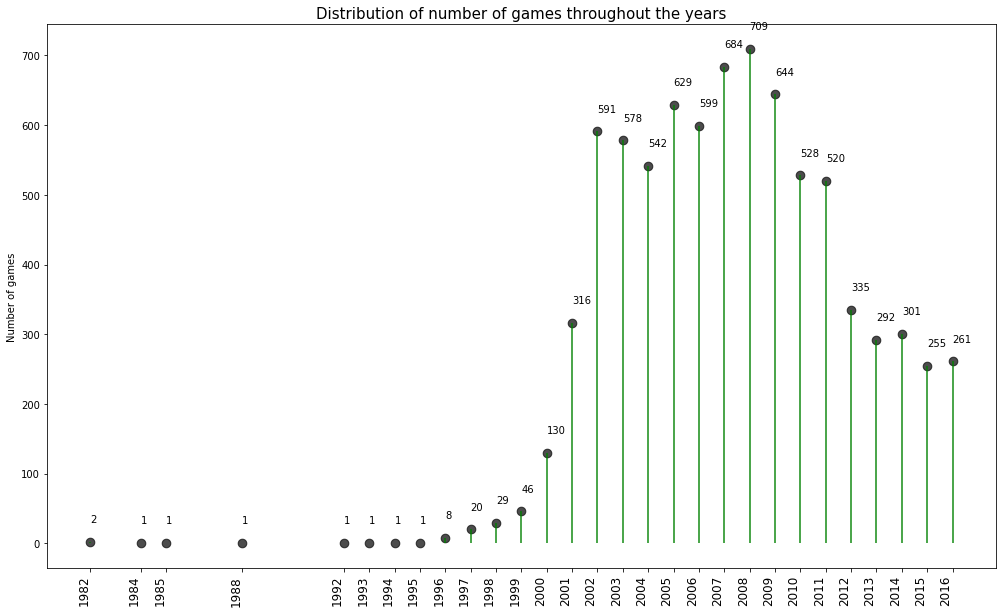

In [46]:
# plotting a chart 
fig,ax = plt.subplots(figsize=(17,10))

ax.vlines(x=year_name_df.year_of_release, ymin=0, ymax=year_name_df.name, color ='green', alpha =0.7, linewidth =2)

ax.scatter(x=year_name_df.year_of_release, y=year_name_df.name, color ='black', s=75, alpha = 0.7)

ax.set_title('Distribution of number of games throughout the years', fontdict={'size':15})

ax.set_ylabel('Number of games')

ax.set_xticks(year_name_df.year_of_release)
ax.set_xticklabels(year_name_df.year_of_release,rotation =90, fontdict={'horizontalalignment':'right', 'size':12})

for row in year_name_df.itertuples():
    ax.text(row.year_of_release, row.name+28, s=round(row.name,2))


We see that that the most of the games were released between 2000 and 2016 period and the most productive period was period from 2002 to 2011. 

#### Look at how sales varied from platform to platform.

In [47]:
# creating an additional df in order to use it for plotting a chart
platform_sales_df = (games_fin[['platform', 'total_sales']].groupby(['platform'])
                .sum().sort_values(by='total_sales').reset_index()
               )

platform_sales_df 

,platform,total_sales
0,SAT,0.59
1,NES,1.22
2,GB,1.41
3,SNES,1.76
4,DC,4.55
5,2600,8.43
6,N64,29.31
7,PSV,33.68
8,WiiU,67.91
9,XOne,133.97


In [48]:
# calculating z-score for sales of each of the platform

platform_sales_df['z_score'] = ( (platform_sales_df['total_sales']-platform_sales_df['total_sales']
                                  .mean())/platform_sales_df['total_sales'].std()
                               )

# adding the color indication to each of the values for z-score

platform_sales_df['color'] = ['red' if x<0 else 'green' for x in platform_sales_df['z_score']]

# checking the results
platform_sales_df

,platform,total_sales,z_score,color
0,SAT,0.59,-0.806995,red
1,NES,1.22,-0.804950,red
2,GB,1.41,-0.804333,red
3,SNES,1.76,-0.803197,red
4,DC,4.55,-0.794138,red
5,2600,8.43,-0.781540,red
6,N64,29.31,-0.713746,red
7,PSV,33.68,-0.699558,red
8,WiiU,67.91,-0.588419,red
9,XOne,133.97,-0.373933,red


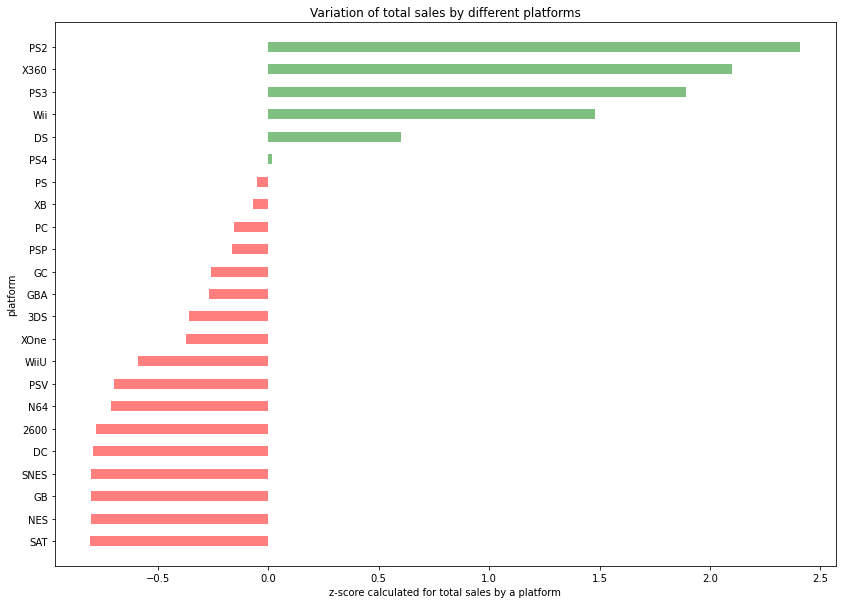

In [49]:
# plotting the chart showing how total sales of different platforms varied

plt.figure(figsize=(14,10))
plt.hlines(y=platform_sales_df.platform, xmax=platform_sales_df.z_score, 
           xmin=0, color=platform_sales_df.color, linewidth =10, alpha=0.5 )

plt.title ("Variation of total sales by different platforms")
plt.suptitle("")
plt.xlabel("z-score calculated for total sales by a platform")
plt.ylabel("platform")

plt.show()

We see that total sales of games within different platforms varied significantly. There are 4 platforms (PS2, X360, PS3, Wii) that are big leaders and two smaller leaders (DS and PS4) in total sales if we calculate sales for all years. The other are outsiders compare to the said leaders. The fact that these platforms are leaders in total sales do not let us say that these platforms continue to grow in terms of sales 

#### Choose the platforms with the greatest total sales and build a distribution based on data for each year.

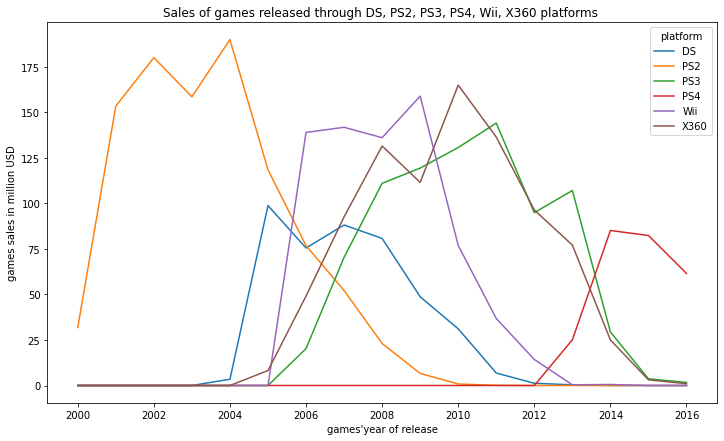

In [50]:
# creating a plot showing how total sales changed with respect of the game's release year
platform_subset = games_fin.query('platform in ["DS", "Wii", "PS3", "X360", "PS2", "PS4"]')

platform_subset.pivot_table(index="year_of_release", columns="platform", values="total_sales", 
                            aggfunc=np.sum, fill_value=0).plot(figsize=(12,7));

plt.title ("Sales of games released through DS, PS2, PS3, PS4, Wii, X360 platforms ")
plt.xlabel("games'year of release")
plt.ylabel("games sales in million USD")
plt.show()


#### Find platforms that used to be popular but now have zero sales.

All of these platforms, but not all platformars equally. PS3 and X360 remained longtime profitable, but in the resent years their sales are equal almost 0. The only exclusion is PS4 platform. The reason is that it is quite new platform, so in 2016 it did not fade away. 

#### How long does it generally take for new platforms to appear and old ones to fade?

It takes generally 5-6 years, there are platforms which remained longtime in the market (such as PS3 and X360), but it's more an exclusion.

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

We should take a period from 2011 to 2016.

#### Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [51]:
# filtering the data by 'year_of_release'

games_filtered = games_fin.query('year_of_release > 2010')

#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

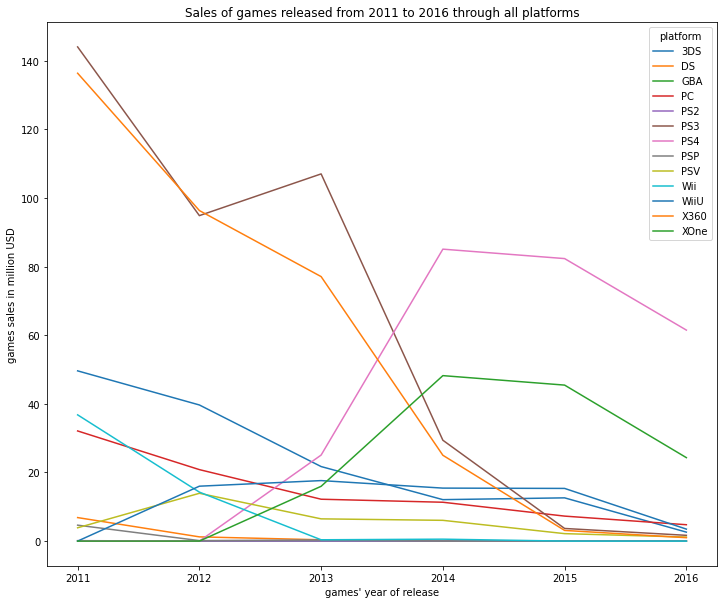

In [52]:
# creating a plot to show how all platforms growing or shrinking through the selected years

games_filtered.pivot_table(index="year_of_release", columns="platform", values="total_sales", 
                            aggfunc=np.sum, fill_value=0).plot(figsize=(12,10));

plt.title ("Sales of games released from 2011 to 2016 through all platforms") 
plt.xlabel("games' year of release")
plt.ylabel("games sales in million USD")
plt.show()


All of the platforms are shrinking, especially after 2015, but XOne, PS4 are not already zero, they still can bring sales, as they remain relatively popular, also we see that PC platform remains to bring more that zero. 

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

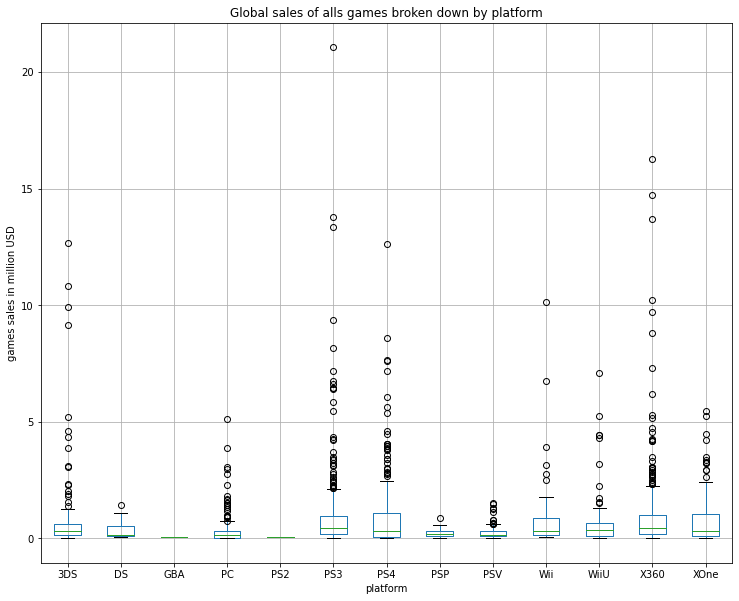

In [53]:
games_filtered.boxplot(column = 'total_sales', by = 'platform', return_type = 'axes',figsize=(12,10) )
plt.title ("Global sales of alls games broken down by platform")
plt.suptitle("")
plt.xlabel("platform")
plt.ylabel("games sales in million USD")
plt.show()

If we take only period from 2011 to 2016 we see that:

1) there is a group of leaders (3DS, PS3, PS4, WiiU, X360 and XOne), whose median sales are higher than 0 and around 0.5 million USD.

2) the median sales of other platforms are close to 0 with, in some cases, a lot amount of outliers above the top threshold(such as PC, 3DS)

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

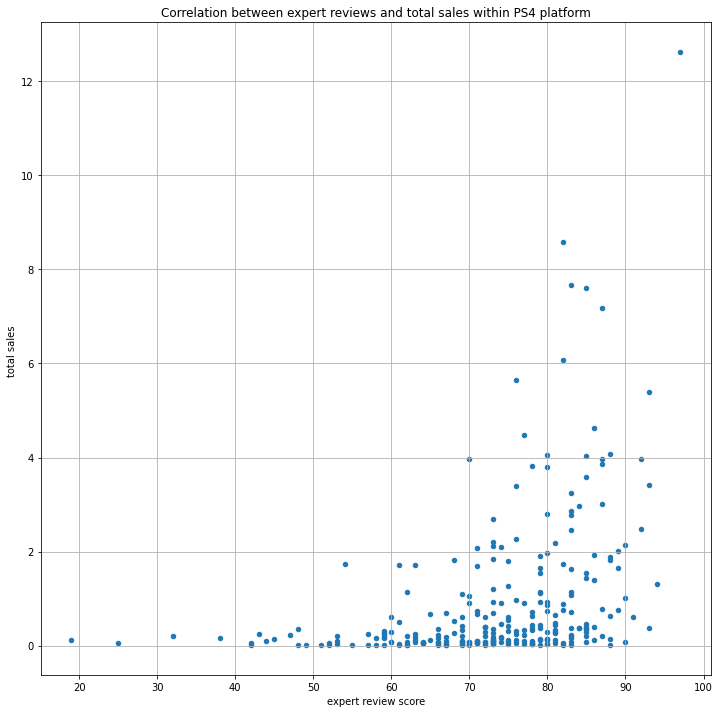

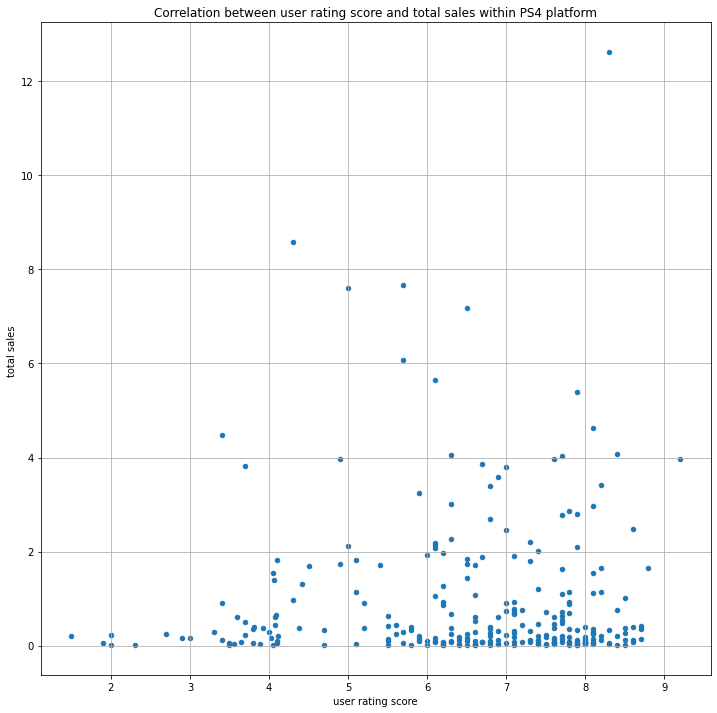

In [54]:
# creating a scatter plot to see if there is a correlation

# making a subset 
games_PS4 = games_filtered.query('platform == "PS4"')

# creating a scatter plot to see if there is a correlation between expert review score and games sales

games_PS4.plot(x='critic_score',
               y = 'total_sales',
               kind = 'scatter', 
               figsize=(12,12), 
               grid = True)
plt.title ("Correlation between expert reviews and total sales within PS4 platform")
plt.suptitle("")
plt.xlabel("expert review score")
plt.ylabel("total sales ")
plt.show()

# creating a scatter plot to see if there is a correlation between user rating score and games sales

games_PS4.plot(x='user_score',
               y = 'total_sales',
               kind = 'scatter', 
               figsize=(12,12), 
               grid = True)
plt.title ("Correlation between user rating score and total sales within PS4 platform")
plt.suptitle("")
plt.xlabel("user rating score")
plt.ylabel("total sales ")
plt.show()


In [55]:
# calculating the correlation coeficients 

print ("Correlation between expert review score and games sales :", 
       games_PS4['critic_score'].corr(games_PS4['total_sales']))

print ("Correlation between  user rating score and games sales :", 
       games_PS4['user_score'].corr(games_PS4['total_sales']))

Correlation between expert review score and games sales : 0.38035377974068973
Correlation between  user rating score and games sales : 0.011651573142132209


Conclusion: the correlation is not significant in both cases, but in the case of expert review score is greater but we see that generally a game should have a good expert review scores in order to bring a lot of revenue. But th opposite is not true. A game might have a good expert review score score, but may be not successful in terms of revenue. The correlation between user rating score and total sales is even  a little bit less significant: there are games which do not have good scores, but are good in sales.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [56]:
# setting up a function to create scatterplots and calculating correlation coeficients

def correlation(platform): 
    # making a subset 
    subset = games_filtered.query('platform == @platform')

    # creating a scatter plot to see if there is a correlation between expert review score and games sales

    subset.plot(x='critic_score',
               y = 'total_sales',
               kind = 'scatter', 
               figsize=(12,12), 
               grid = True)
    plt.title ("Correlation between expert reviews and total sales within {} platform".format(platform))
    plt.suptitle("")
    plt.xlabel("expert review score")
    plt.ylabel("total sales ")
    plt.show()

    # creating a scatter plot to see if there is a correlation between user rating score and games sales

    subset.plot(x='user_score',
               y = 'total_sales',
               kind = 'scatter', 
               figsize=(12,12), 
               grid = True)
    plt.title ("Correlation between user rating score and total sales within {} platform".format(platform))
    plt.suptitle("")
    plt.xlabel("user rating score")
    plt.ylabel("total sales ")
    plt.show()
    print ("Correlation between expert review score and games sales within {} platform:".format(platform), 
       subset['critic_score'].corr(subset['total_sales']))

    print ("Correlation between  user rating score and games sales within {} platform:".format(platform), 
       subset['user_score'].corr(subset['total_sales']))
    


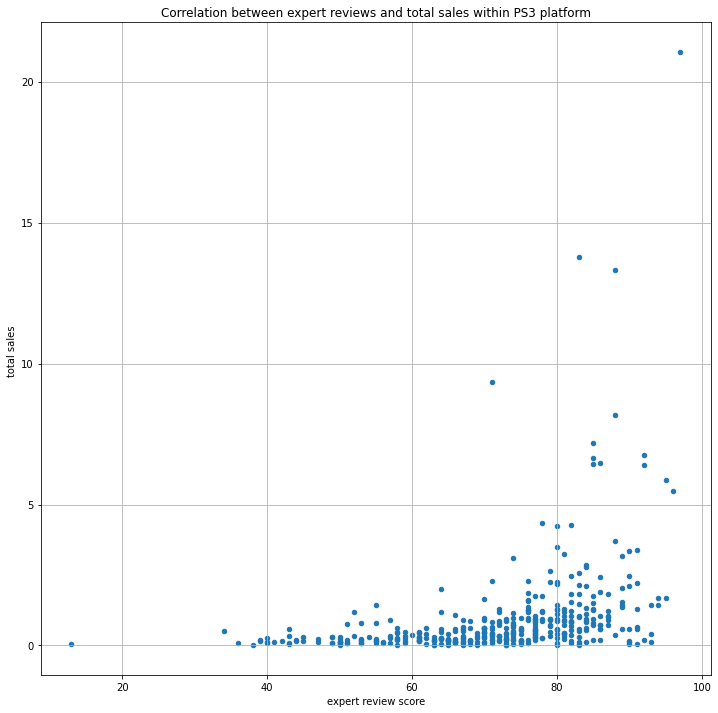

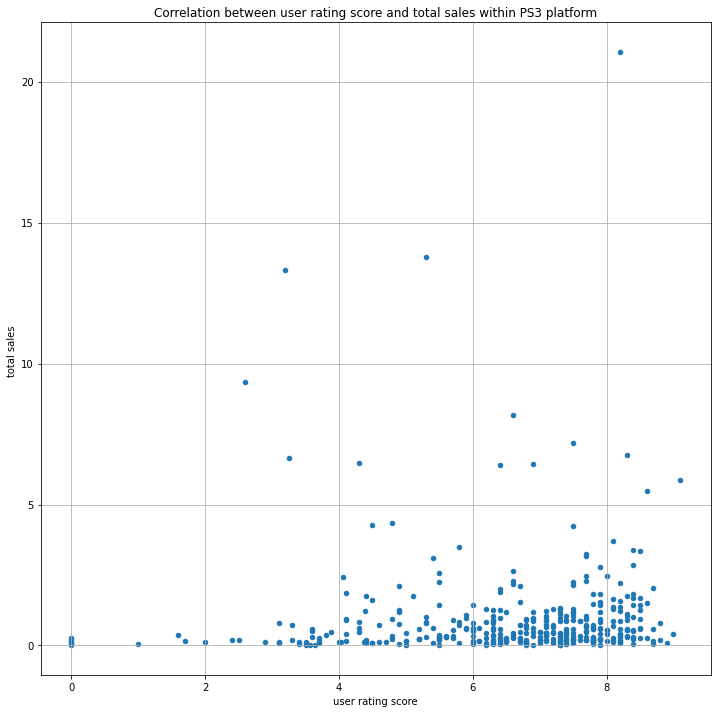

Correlation between expert review score and games sales within PS3 platform: 0.3635463323314111
Correlation between  user rating score and games sales within PS3 platform: 0.02859603988349499


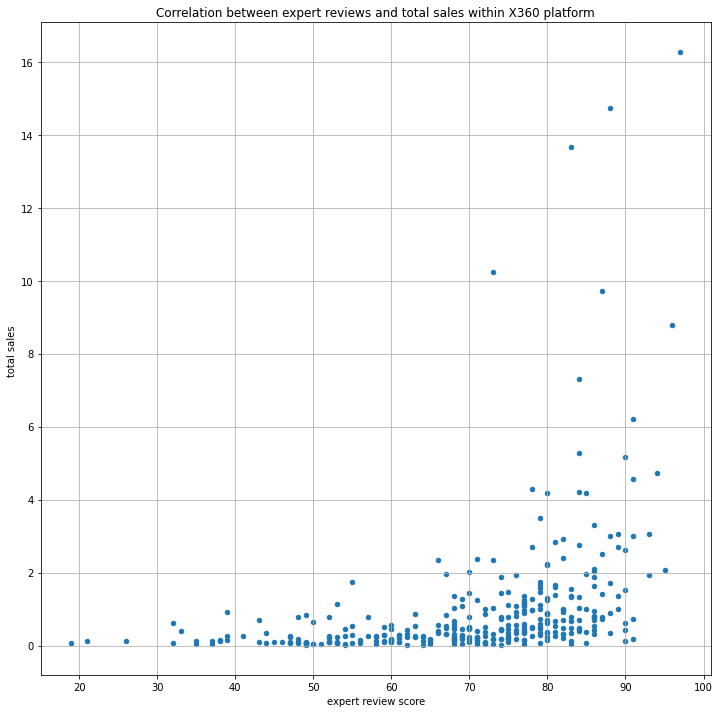

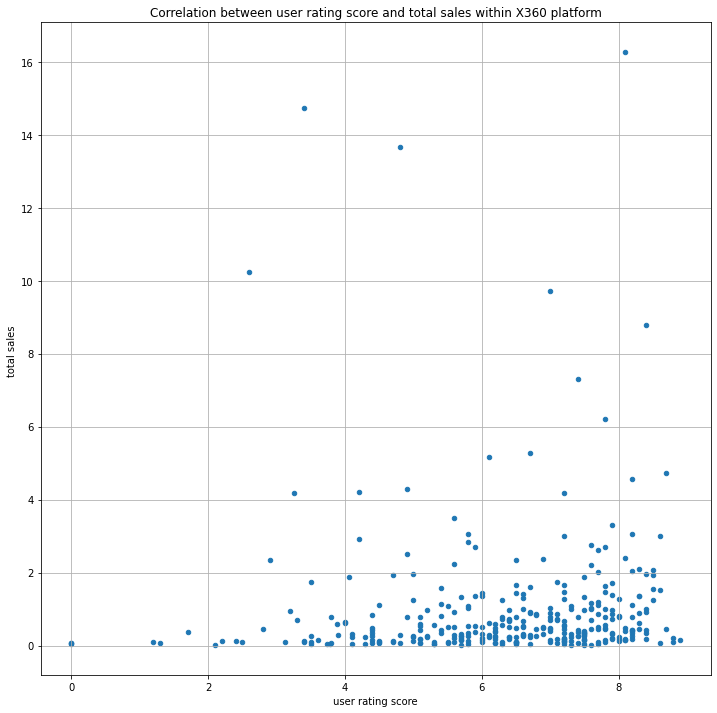

Correlation between expert review score and games sales within X360 platform: 0.3782569085715702
Correlation between  user rating score and games sales within X360 platform: 0.03832694027965386


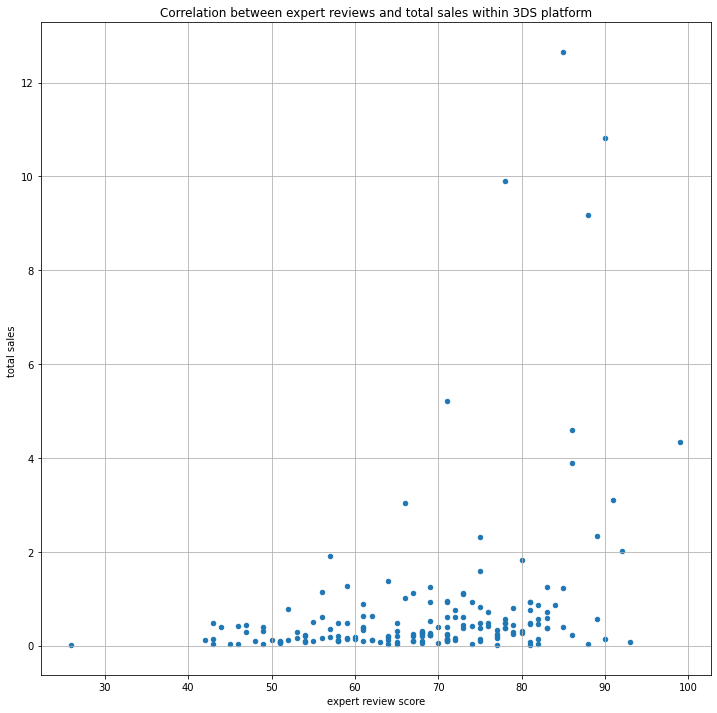

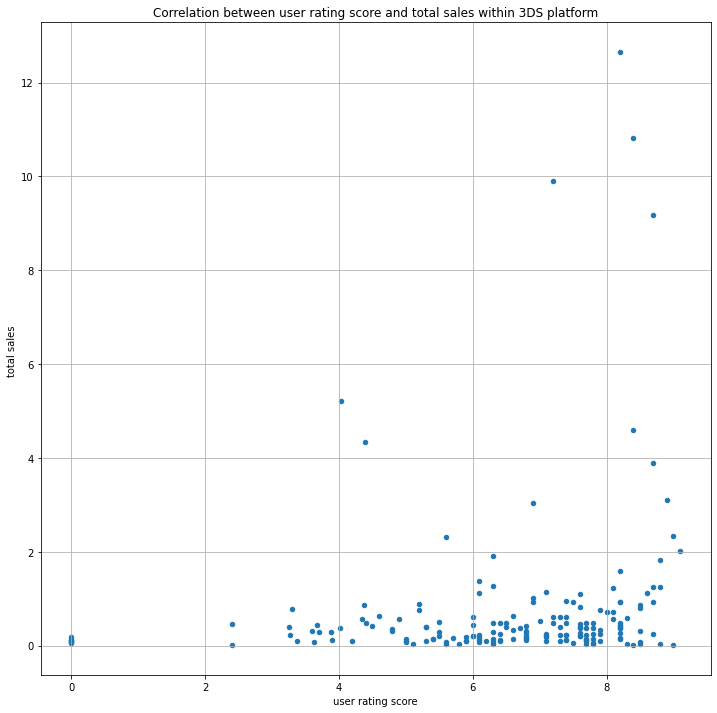

Correlation between expert review score and games sales within 3DS platform: 0.33279446961887843
Correlation between  user rating score and games sales within 3DS platform: 0.1813868811607625


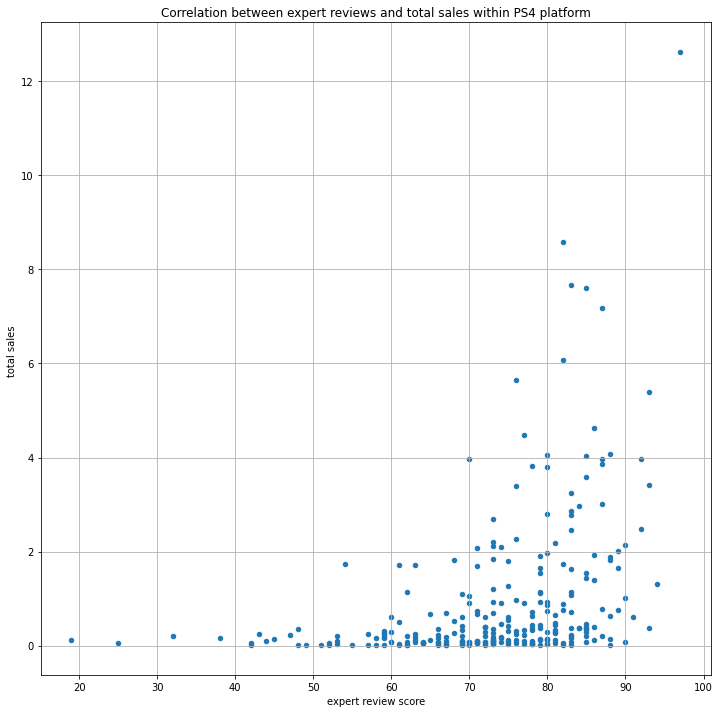

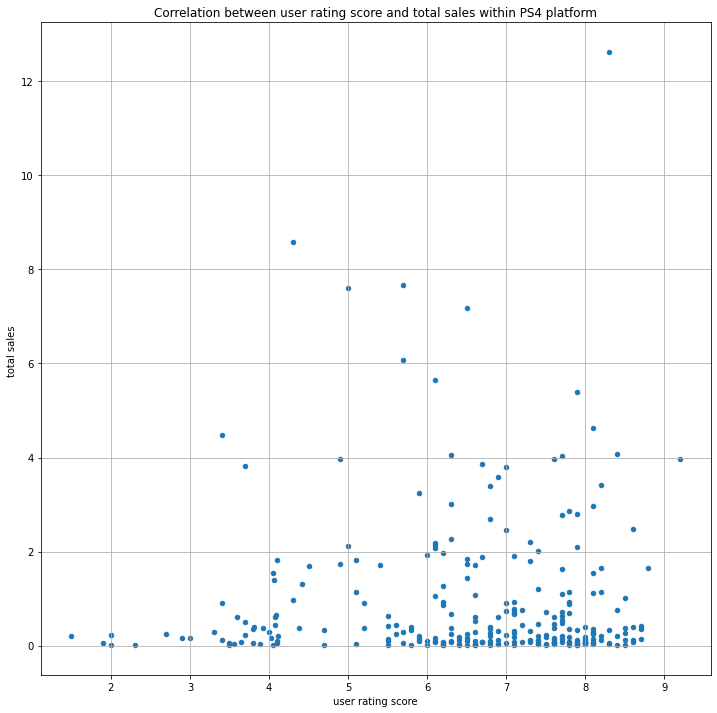

Correlation between expert review score and games sales within PS4 platform: 0.38035377974068973
Correlation between  user rating score and games sales within PS4 platform: 0.011651573142132209


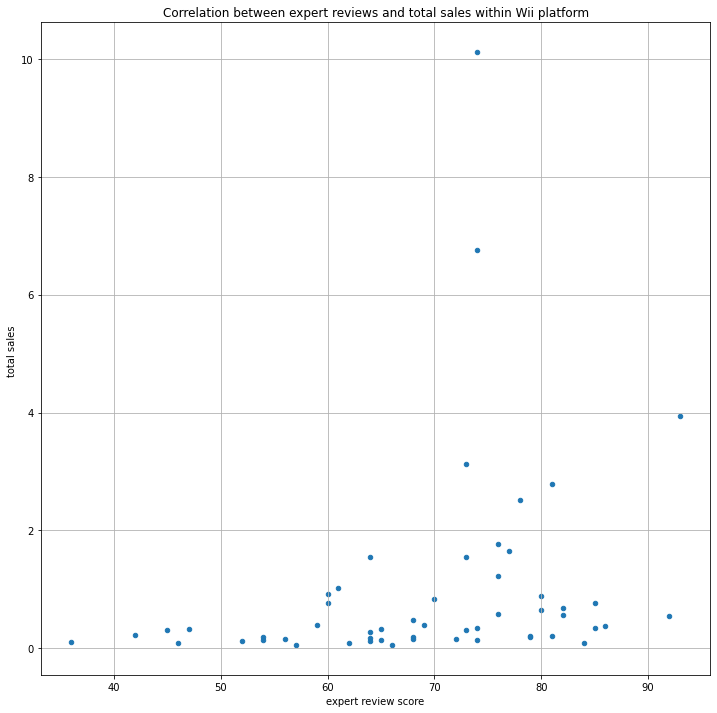

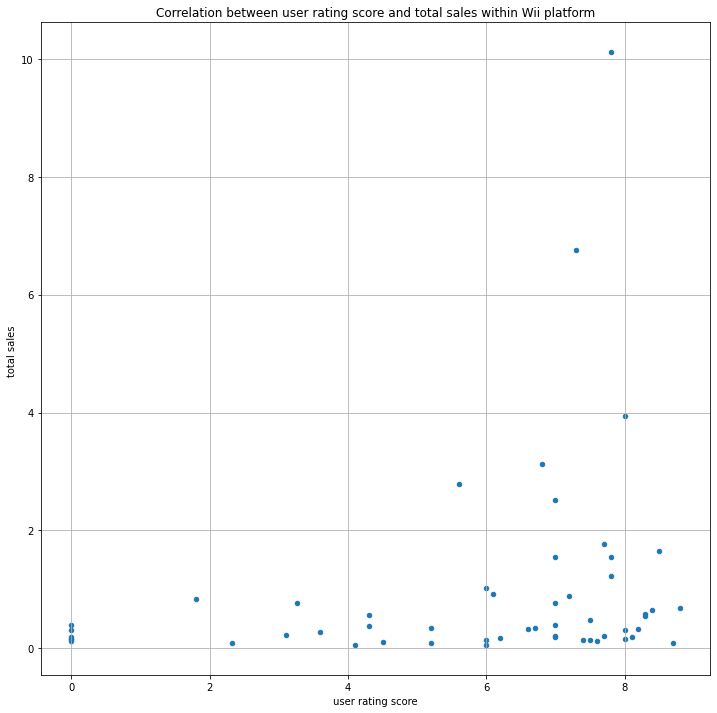

Correlation between expert review score and games sales within Wii platform: 0.2556844095093752
Correlation between  user rating score and games sales within Wii platform: 0.23732668379045746


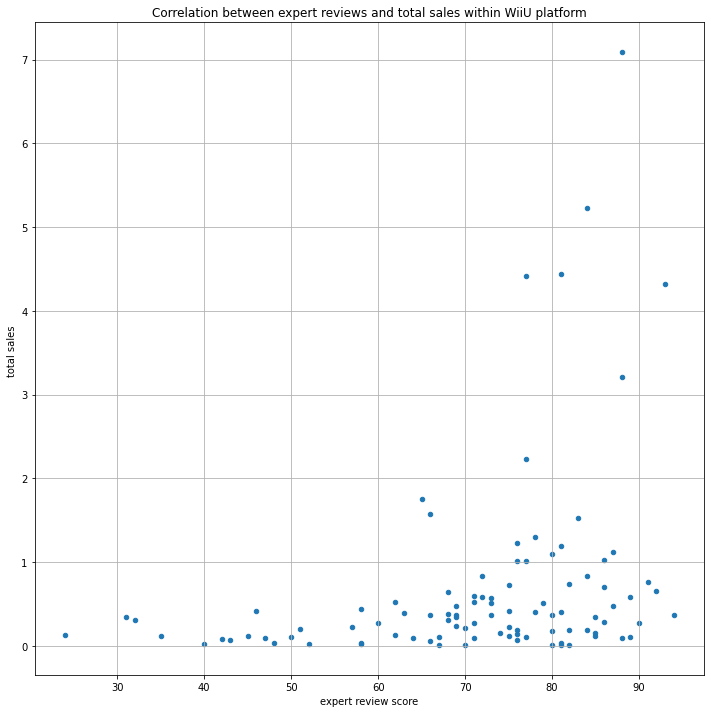

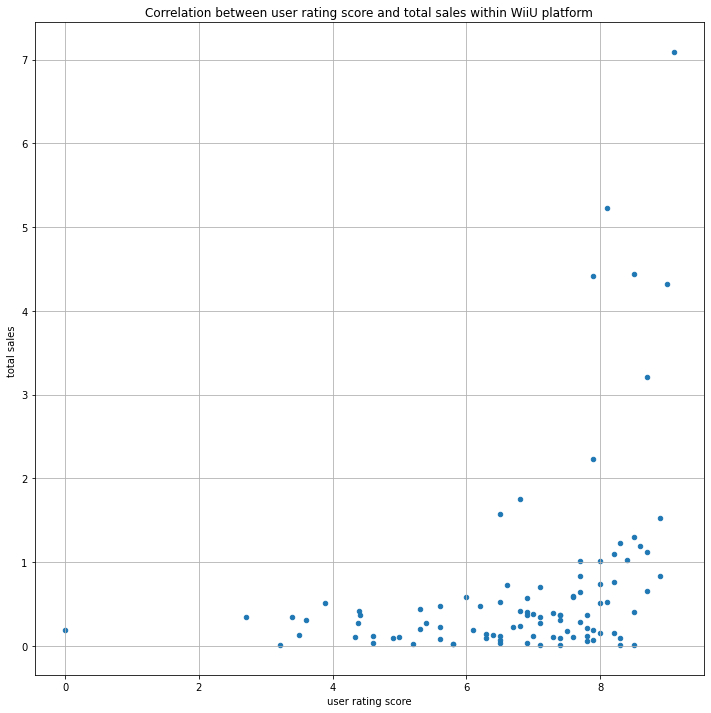

Correlation between expert review score and games sales within WiiU platform: 0.311166900406548
Correlation between  user rating score and games sales within WiiU platform: 0.369673234195925


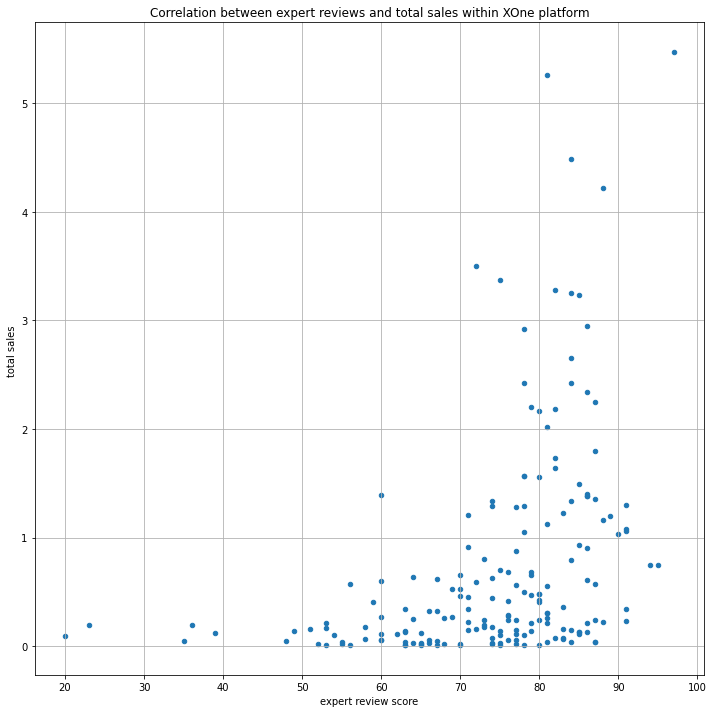

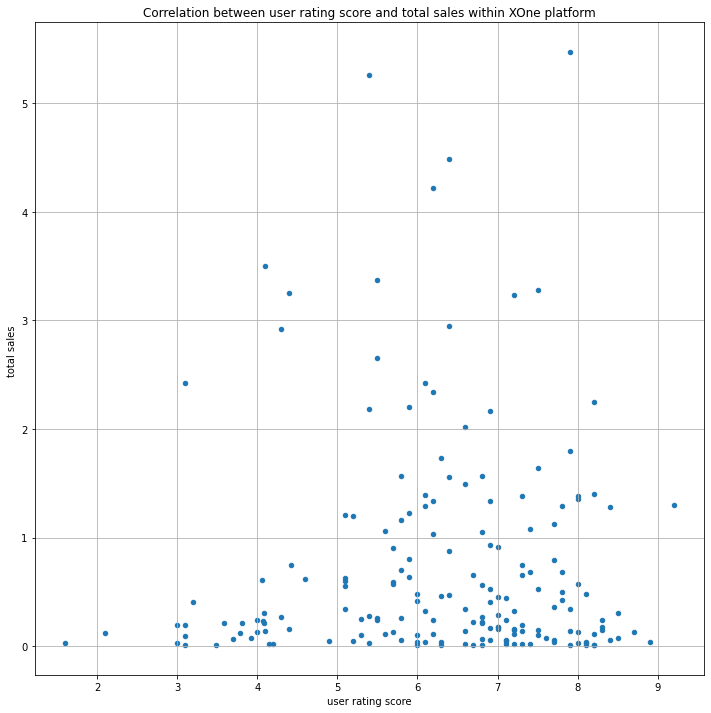

Correlation between expert review score and games sales within XOne platform: 0.3826321714555152
Correlation between  user rating score and games sales within XOne platform: 0.006712863480533829


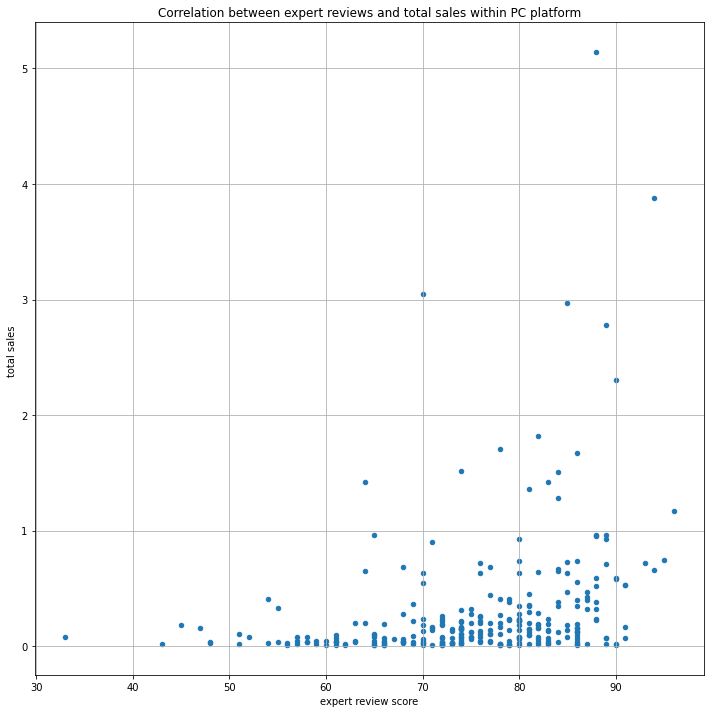

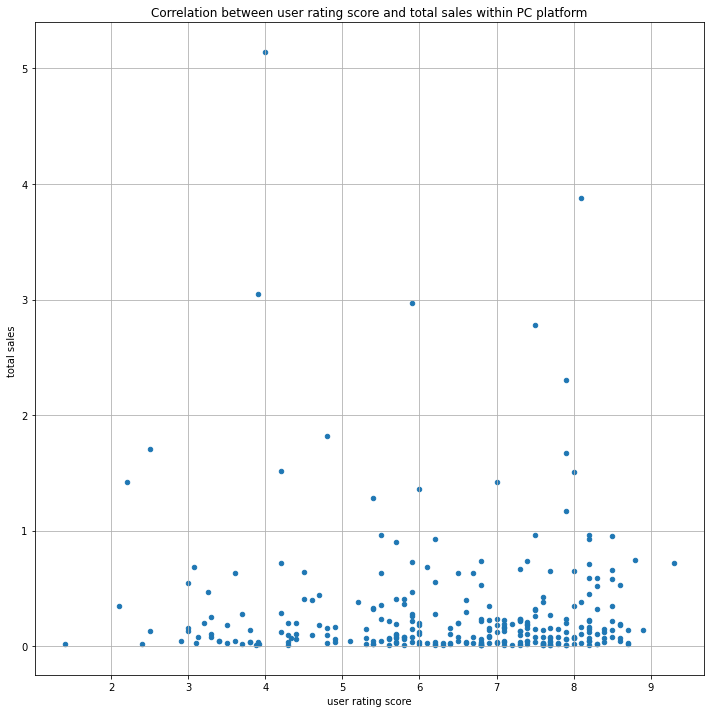

Correlation between expert review score and games sales within PC platform: 0.29592392564739856
Correlation between  user rating score and games sales within PC platform: -0.049883751638170055


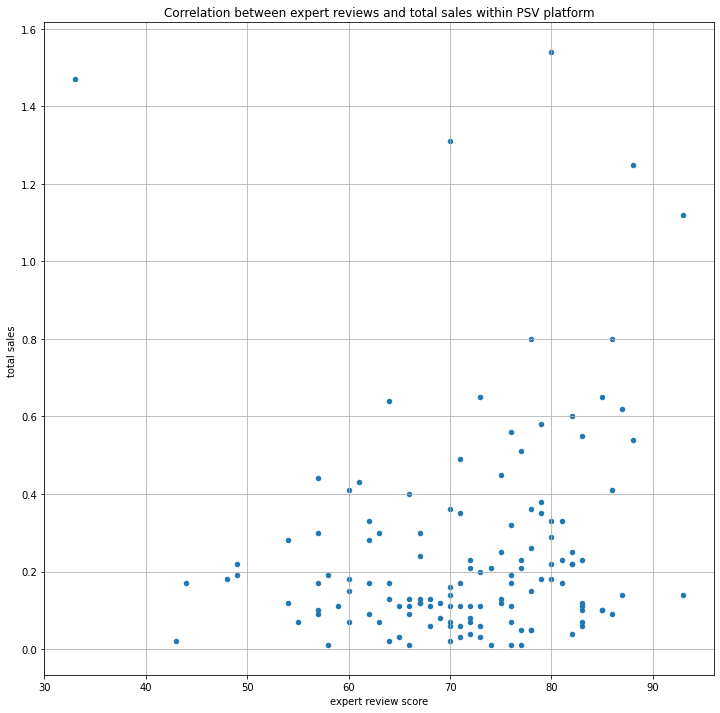

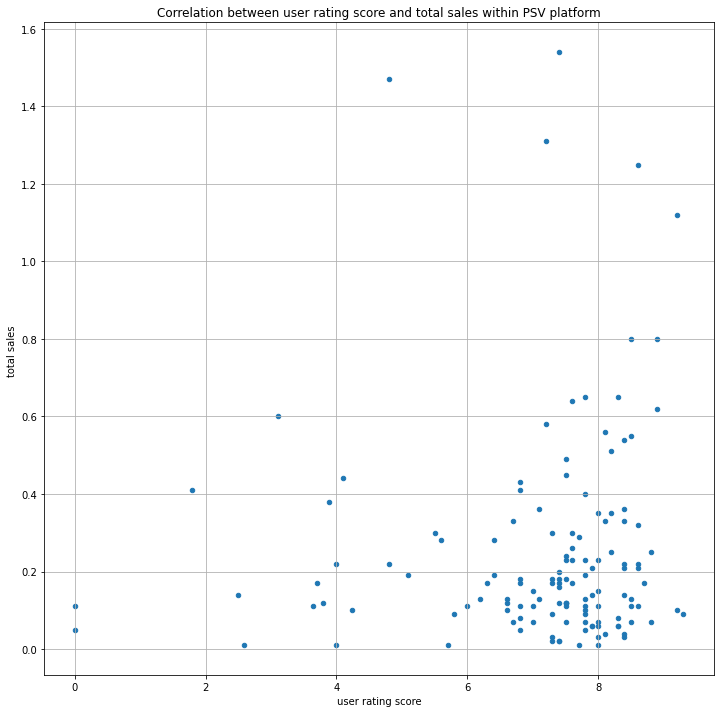

Correlation between expert review score and games sales within PSV platform: 0.12152609157913122
Correlation between  user rating score and games sales within PSV platform: 0.07311515421770833


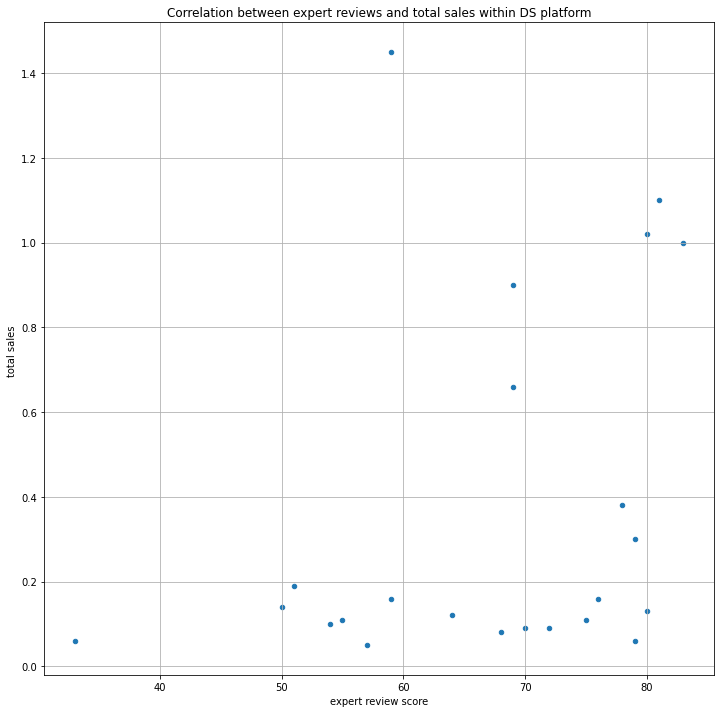

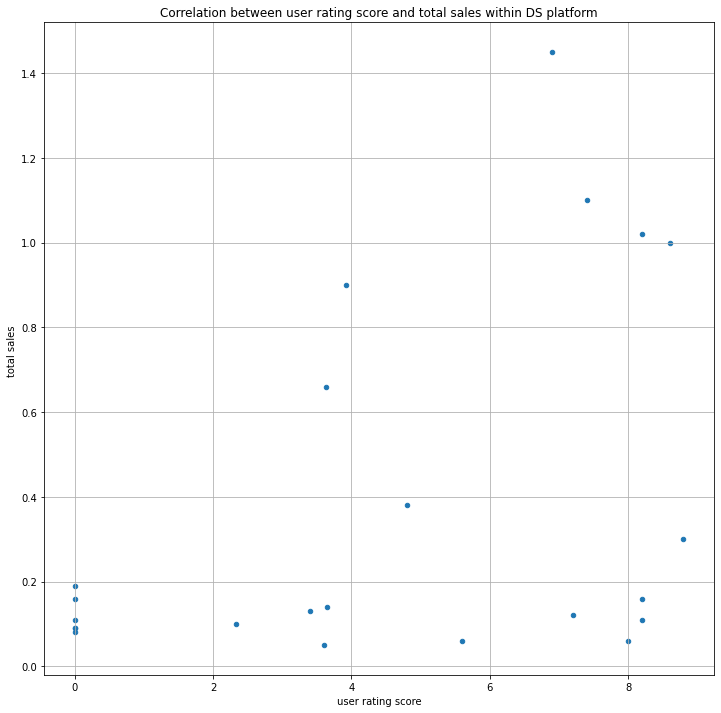

Correlation between expert review score and games sales within DS platform: 0.3118634227504588
Correlation between  user rating score and games sales within DS platform: 0.4252147757037053


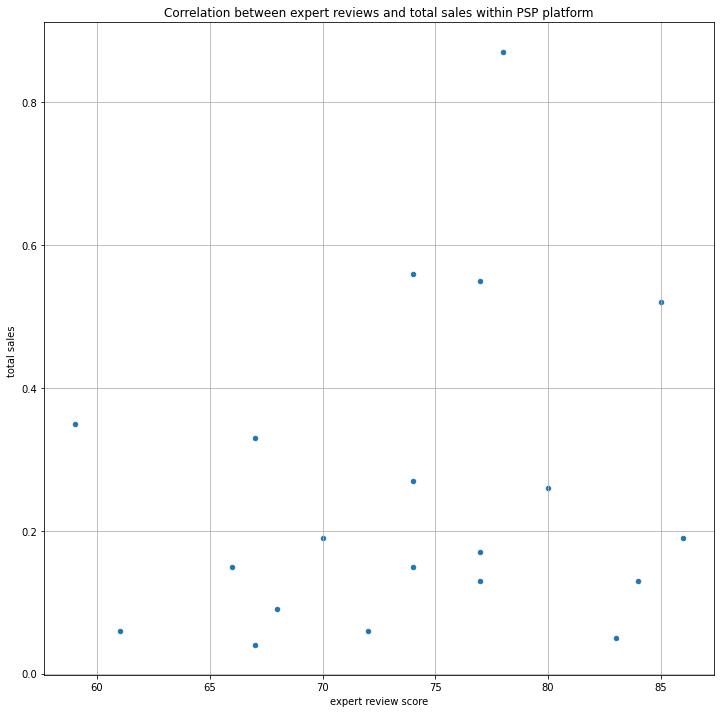

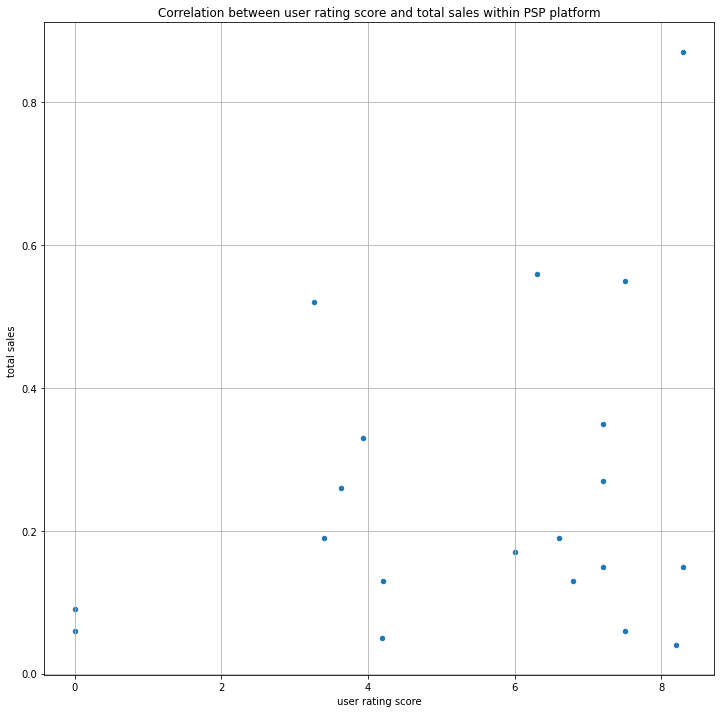

Correlation between expert review score and games sales within PSP platform: 0.19827037000849257
Correlation between  user rating score and games sales within PSP platform: 0.2707064608689052


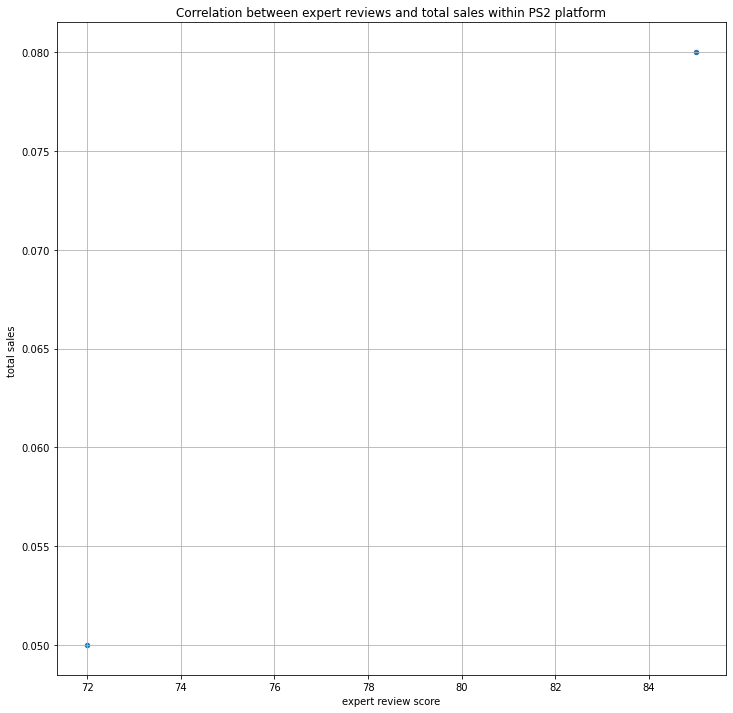

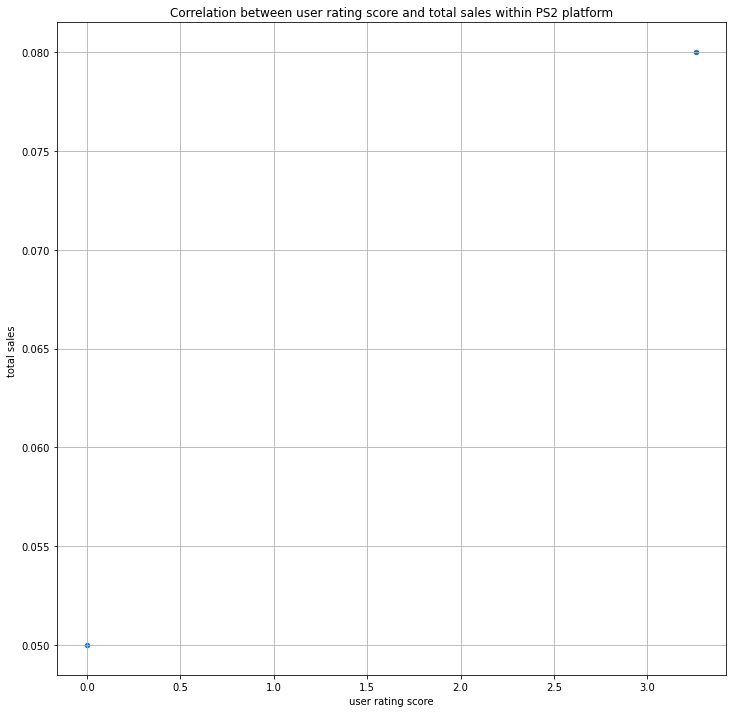

Correlation between expert review score and games sales within PS2 platform: 1.0
Correlation between  user rating score and games sales within PS2 platform: 0.9999999999999999


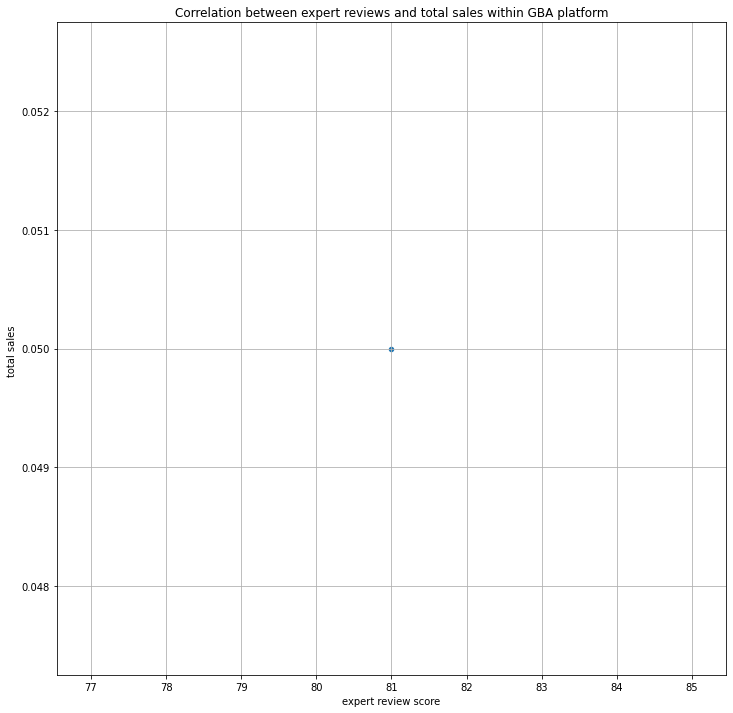

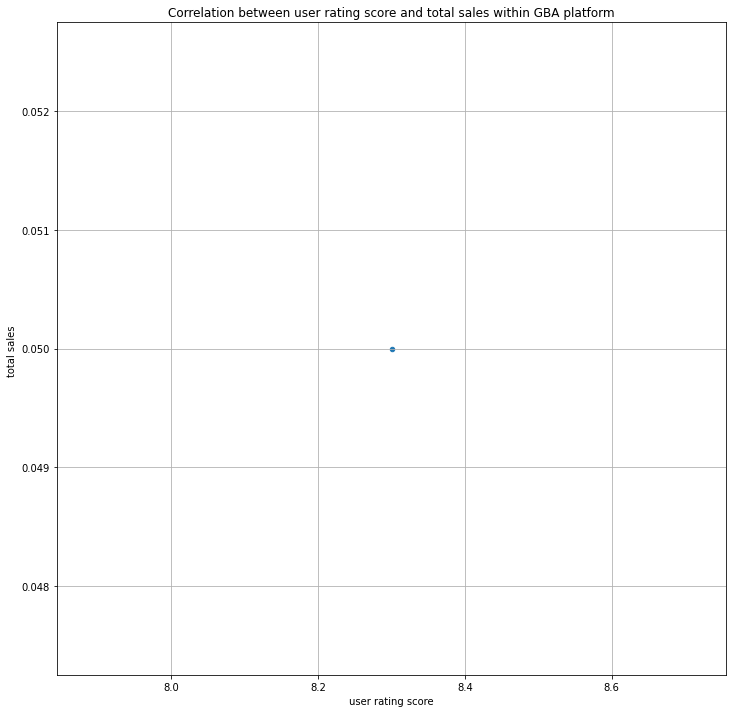

Correlation between expert review score and games sales within GBA platform: nan
Correlation between  user rating score and games sales within GBA platform: nan


In [57]:
# creating scatter plots by using the function and  iterating through the all platforms

for platform in games_filtered['platform'].unique():
    correlation(platform)

<div class="alert alert-warning">
<b>Reviewer's comment:</b> Nice plot generator! You can imporove this part with plt.subplots: <a>https://www.kaggle.com/asimislam/tutorial-python-subplots</a>
</div>


<div class="alert alert-info"> <b>Student's comment:</b> Looks interesting, I will study this method</div>

After examining all of the platforms, we see that our conlusion related to PS4 was also true for other platforms. Sales do not correlation significantly with the expert review scores and user rating scores, but in the most cases the profitable games have good expert review scores. But in the case of user rating scores it does not work the same.

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [58]:
# creating a pivot table to calculate the number of games released in each of the genres and an average sales in each of the genres
genres_pivot = games_filtered.pivot_table(index='genre', values = ['total_sales'], aggfunc = ['count', 'sum', 'mean', 'median'])
genres_pivot.columns = ['number_of_games', 'total_sales', 'average_sales', 'median_sales']
genres_pivot.sort_values(by='number_of_games', ascending=False)

,number_of_games,total_sales,average_sales,median_sales
genre,,,,
Action,639,461.03,0.721487,0.270
Shooter,267,356.86,1.336554,0.520
Sports,226,196.60,0.869912,0.430
Role-Playing,218,144.53,0.662982,0.250
Racing,123,74.08,0.602276,0.220
Fighting,100,45.57,0.455700,0.300
Misc,92,66.53,0.723152,0.330
Adventure,86,22.77,0.264767,0.090
Platform,84,76.75,0.913690,0.255


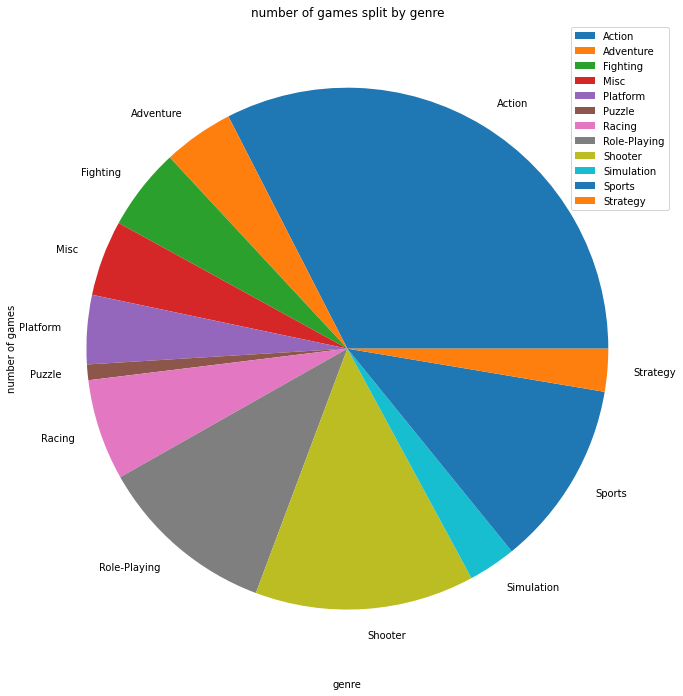

In [59]:
# looking at distribution of number games by genres by plotting a pie plot
genres_pivot.plot(kind='pie', x = 'genre', y = 'number_of_games', figsize =(12,12))
plt.title ("number of games split by genre")
plt.suptitle("")
plt.xlabel("genre")
plt.ylabel("number of games")
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment:</b> I like this pie chart, but in this case annotated barplot would be more informative. Check this link, please: <a>https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html</a>
</div>

<div class="alert alert-info"> <b>Student's comment:</b> Yeah, it could be added too! Thanks once again for the hint!.</div>

Most popular genres: Action, Shooter, Sports, Role-Playing, Racing, together they make more than a half of all games

In [60]:
# sorting pivot table by average sales
genres_pivot.sort_values(by='average_sales', ascending=False)

,number_of_games,total_sales,average_sales,median_sales
genre,,,,
Shooter,267,356.86,1.336554,0.520
Platform,84,76.75,0.913690,0.255
Sports,226,196.60,0.869912,0.430
Misc,92,66.53,0.723152,0.330
Action,639,461.03,0.721487,0.270
Role-Playing,218,144.53,0.662982,0.250
Simulation,58,35.73,0.616034,0.190
Racing,123,74.08,0.602276,0.220
Fighting,100,45.57,0.455700,0.300


In [61]:
# sorting pivot table by average sales
genres_pivot.sort_values(by='median_sales', ascending=False)

,number_of_games,total_sales,average_sales,median_sales
genre,,,,
Shooter,267,356.86,1.336554,0.520
Sports,226,196.60,0.869912,0.430
Misc,92,66.53,0.723152,0.330
Fighting,100,45.57,0.455700,0.300
Action,639,461.03,0.721487,0.270
Platform,84,76.75,0.913690,0.255
Role-Playing,218,144.53,0.662982,0.250
Racing,123,74.08,0.602276,0.220
Strategy,52,16.47,0.316731,0.205


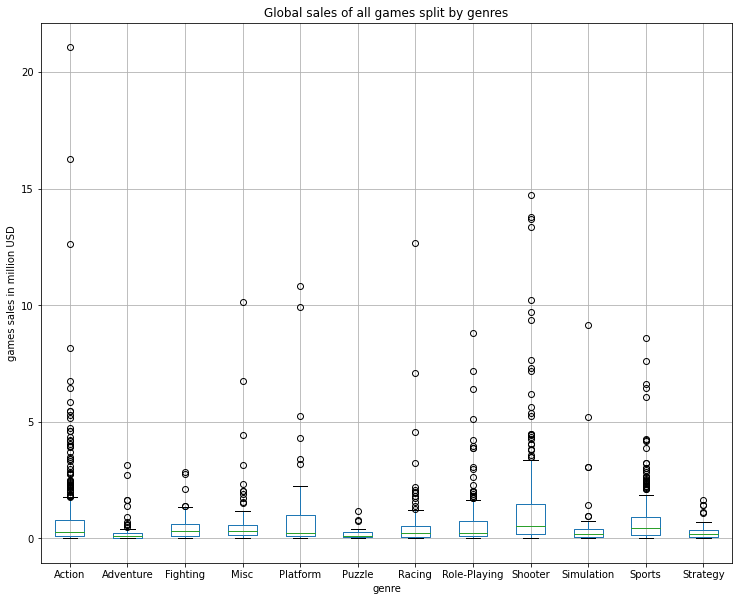

In [62]:
# looking at the distribution of sales split by genres by plotting box-plot with whiskers
games_filtered.boxplot(column = 'total_sales', by = 'genre', return_type = 'axes',figsize=(12,10) )
plt.title ("Global sales of all games split by genres")
plt.suptitle("")
plt.xlabel("genre")
plt.ylabel("games sales in million USD")
plt.show()

The top five most profitable in terms of average sales are: Shooter (1.3 Million USD), Platform (0.9 Million USD), Sports (0.8 Million USD), Misc (0.723 Million USD), Action (0.721 Million USD). 

So three of the most popular genres are the same tume the most profitable if  we take into account average sales. But Platform and Misc are not very popular in terms of number of released games, but they are the most profitable. The genre Puzzle is in the end of two lists: it is the most unpopular game and the lowest profitable in terms of average sales (0.24 Million USD). 

The other low profitable game genres are: Adventure (0.26 Million USD), Strategy (0.31 Million USD), Fighting (0.45 Million USD).

At the same time, as we see from the boxplots, almost in any genre there are high revenue outliers which affect the average sales. 

So if we compare the genres with regard to median sales the top five most profitable genres would be: Shooter (0.52 Million USD), Sports (0.43 Million USD), Misc (0.33 Million USD), Fighting (0.3 Million USD), Action	(0.27 Million USD). So the Platform is not in the list, while Fighting is. 

The list of low profitable genres in terms of median sales is also a little different: Strategy(0.205 Million USD), Simulation(0.19 Million USD), Puzzle (0.1 Million USD), Adventure(0.09 Million USD). So the Puzzle is not the end, and Fighting is replaced by Simulation.

Summing up two fundings we may figure out, that: 

1) the high profitable genres were Shooter, Sports, Misc, Action which are leaders in terms average and median sales. 
2) the low profitable genres were Strategy, Puzzle, and Adventure which are outsiders in terms averages and median sales. 


### Conclusion

A. Released games number distribution throughout the years

We have found that  the most of the games were released between 2000 and 2016 period and the most productive period was period from 2002 to 2011. After 2011 the number of games released per year constantly decreased. 

B. Total games sales via platforms. 

We see that total sales of games within different platforms varied significantly. There are 4 platforms (PS2, X360, PS3, Wii) that are big leaders and two smaller leaders (DS and PS4) in total sales if we calculate sales for all years. The others are outsiders compare to the said leaders. The fact that these platforms are leaders in total sales do not let us say that these platforms continue to grow in terms of sales.

We choosed the leaders in sales (the platforms DS, Wii, PS3, X360, PS2, PS4) and builded a plot to see how total sales via those platforms varied through the years. We found all of the leaders showed 0 sales for the gamees released in recent years. The only exception is PS4 platform. The reason is that it is quite new platform, so in 2016 it did not fade away.

We found that it takes generally 5-6 years for new platform to appear and fade away, there are platforms which remained longtime in the market (such as PS3 and X360), but it's more an exclusion.

That's why we have decided that for our further analysis we should take a period from 2011 to 2016.

C. Growing and shrinking platforms

We have found, that all of the platforms are shrinking, especially after 2015, but XOne, PS4 are not already zero, they still can bring sales, as they remain relatively popular, also we see that PC platform remains to bring more than zero as well.

D. Global sales of games split by platforms

We have builded boxplots to see how sales of all games were distributed via the platforms and found that:

1) there is a group of leaders (3DS, PS3, PS4, WiiU, X360 and XOne), whose median sales are higher than 0 and around 0.5 million USD.
2) the median sales of other platforms are close to 0.  

In the both groups there are platforms with a lot amount of outliers above the top threshold(such as PC, 3DS).

E. User rating score and expet review scores and sales

We builded scatter plots and calculated Pearson correlation coefficients to find out if there is a correlation between user rating scores and expert review scores and sales of games. We have found that the correlation is not significant in both cases, but in the case of expert review score is greater but we see that generally a game should have a good expert review scores in order to bring a lot of revenue. But th opposite is not true. A game might have a good expert review score score, but may be not successful in terms of revenue. The correlation between user rating score and total sales is even a little bit less significant: there are games which do not have good scores, but are good in sales.

We have first examined this question with regard PS 4, and then with regard all the platforms. The fundings were the same. 

F. Genres, distribution of number of games within the genres, distribution of sales within the genres.

We have found that the most popular genres were  Action, Shooter, Sports, Role-Playing, Racing, together they made more than a half of all games.

The top five most profitable in terms of average sales were: 
- Shooter (1.3 Million USD), 
- Platform (0.9 Million USD), 
- Sports (0.8 Million USD),
- Misc (0.723 Million USD),
- Action (0.721 Million USD). 
So three of the most popular genres are the same tume the most profitable if we take into account average sales. But Platform and Misc are not very popular in terms of number of released games, but they are the most profitable. The genre Puzzle is in the end of two lists: it is the most unpopular game and the lowest profitable in terms of average sales (0.24 Million USD). 

The other low profitable game genres are: 
- Adventure (0.26 Million USD), 
- Strategy (0.31 Million USD), 
- Fighting (0.45 Million USD).

At the same time, as we see from the boxplots, almost in any genre there are high revenue outliers which affect the average sales. 

So if we compare the genres with regard to median sales the top five most profitable genres would be: 
- Shooter (0.52 Million USD), 
- Sports (0.43 Million USD), 
- Misc (0.33 Million USD), 
- Fighting (0.3 Million USD), 
- Action (0.27 Million USD). 

So the genre Platform is not in the list, while Fighting is. 

The list of low profitable genres in terms of median sales is also a little different: 
- Strategy(0.205 Million USD), 
- Simulation(0.19 Million USD), 
- Puzzle (0.1 Million USD), 
- Adventure(0.09 Million USD). 
So the Puzzle is not at the end, and Fighting is replaced by Simulation.

Summing up two fundings we may figure out, that: 

1) the high profitable genres were 
- Shooter,
- Sports, 
- Misc,
- Action 

which are leaders in terms average and median sales. 

2) the low profitable genres were 
- Strategy, 
- Puzzle, and 
- Adventure 
which are outsiders in terms averages and median sales.

## Step 4: Creating a user profile for each region

#### For each region (NA, EU, JP), determine:


#### • The top five platforms. Describe variations in their market shares from region to region.

In [63]:
# creating a function returning a pivot table with data on platforms and 
# their market share for a given market 

def top_platforms(market):
    
    
    # creating a pivot table to make the calculations
    
    subset = games_filtered.pivot_table(index='platform', values = [market], aggfunc = ['sum', 'mean'])
    
    subset.columns = [market, 'average_sales']
    
    subset['platform_share'] = (subset[market] / subset[market].sum())
    
 
    display(subset.sort_values(by='platform_share', ascending=False))
    
    

In [64]:
# looking at the top platforms in Northen America

top_platforms('na_sales')

,na_sales,average_sales,platform_share
platform,,,
X360,200.10,0.597313,0.298782
PS3,146.85,0.379457,0.219271
PS4,87.55,0.327903,0.130726
XOne,78.09,0.429066,0.116601
3DS,53.49,0.303920,0.079869
WiiU,31.49,0.321327,0.047020
PC,28.18,0.098877,0.042077
Wii,26.92,0.498519,0.040196
PSV,10.52,0.078507,0.015708


In [65]:
# looking at the top platforms in Japan

top_platforms('jp_sales')

,jp_sales,average_sales,platform_share
platform,,,
3DS,37.68,0.214091,0.347569
PS3,32.47,0.083902,0.299511
PS4,10.51,0.039363,0.096947
WiiU,10.19,0.103980,0.093995
PSV,8.02,0.059851,0.073978
Wii,3.75,0.069444,0.034591
X360,2.72,0.008119,0.025090
PSP,1.88,0.094000,0.017342
DS,0.90,0.039130,0.008302


In [66]:
# looking at the top platforms in Europe

top_platforms('eu_sales')

,eu_sales,average_sales,platform_share
platform,,,
PS3,144.30,0.372868,0.261930
PS4,116.56,0.436554,0.211577
X360,106.51,0.317940,0.193335
PC,50.15,0.175965,0.091031
XOne,43.60,0.239560,0.079142
3DS,38.58,0.219205,0.070030
WiiU,21.28,0.217143,0.038627
Wii,16.76,0.310370,0.030422
PSV,10.11,0.075448,0.018351


The top five platforms in Europe are: 

- PS3	(market share is 0.26)
- PS4	(market share is 0.21)
- X360	(market share is 0.19)
- PC	(market share is 0.09)
- XOne	(market share is 0.07)


The top five platforms in Japan are: 

- 3DS	(market share is 0.34)
- PS3	(market share is 0.29)
- PS4	(market share is 0.09)
- WiiU  (market share is 0.09)
- PSV	(market share is 0.07)

The top five platforms in the Northen America are: 
    
- X360 (market share is 0.29)
- PS3  (market share is 0.21)
- PS4  (market share is 0.13)
- XOne (market share is 0.11)
- 3DS  (market share is 0.07)

The only two platforms are commun for all three markets: PS3 and PS4. In Europe and in the Northen America there are also two other common leader platforms - X360 (top platform in the Northen America and the third in Europe) and XOne (the fourth place in the Northen America and the fifth place in Europe). 

Japan and the Northen America markets also have common leader: 3DS (the fifth place in the Northen America and the first(!) in Japan). 

On japanese market there are also leaders two other platforms (WiiU and PSV), which are not listed in other to charts. 

In other hand, in Europe there are also some specific leader: PC which is not leading in other markets. 


#### • The top five genres. Explain the difference.

In [67]:
# creating a function returning a pivot table with genres and 
# their market share for each of market 

def top_genres(market):
    
    
    # creating a pivot table to make the calculations
    
    subset = games_filtered.pivot_table(index='genre', values = [market], aggfunc = ['sum', 'mean'])
    
    subset.columns = [market, 'average_sales']
    
    subset['genre_share'] = (subset[market] / subset[market].sum())
    
 
    display(subset.sort_values(by='genre_share', ascending=False))

In [68]:
# finding top genres in Japan
top_genres('jp_sales')

,jp_sales,average_sales,genre_share
genre,,,
Action,28.51,0.044617,0.262983
Role-Playing,24.56,0.112661,0.226547
Platform,11.45,0.136310,0.105618
Shooter,10.69,0.040037,0.098607
Simulation,9.43,0.162586,0.086985
Misc,5.76,0.062609,0.053132
Fighting,5.52,0.055200,0.050918
Racing,5.30,0.043089,0.048888
Sports,3.60,0.015929,0.033207


In [69]:
# finding top genres in Northen America
top_genres('na_sales')

,na_sales,average_sales,genre_share
genre,,,
Action,199.03,0.311471,0.297184
Shooter,173.54,0.649963,0.259123
Sports,91.35,0.404204,0.136400
Role-Playing,59.70,0.273853,0.089142
Misc,36.73,0.399239,0.054844
Platform,32.68,0.389048,0.048797
Racing,26.40,0.214634,0.039419
Fighting,22.59,0.225900,0.033731
Simulation,10.02,0.172759,0.014961


In [70]:
# finding top genres in Europe
top_genres('eu_sales')

,eu_sales,average_sales,genre_share
genre,,,
Action,176.73,0.276573,0.320797
Shooter,130.23,0.487753,0.236391
Sports,76.80,0.339823,0.139406
Role-Playing,45.09,0.206835,0.081846
Racing,34.26,0.278537,0.062188
Platform,25.52,0.303810,0.046323
Misc,18.15,0.197283,0.032945
Simulation,13.93,0.240172,0.025285
Fighting,12.39,0.123900,0.022490


Top five genres in Europe:

- Action	   (market share is 0.32)
- Shooter	   (market share is 0.23)
- Sports	   (market share is 0.13)
- Role-Playing (market share is 0.08)
- Racing	   (market share is 0.06)

Top five genres in the Northen America:

- Action	    (market share is 0.29)
- Shooter	    (market share is 0.25)
- Sports	    (market share is 0.13)
- Role-Playing	(market share is 0.08)
- Misc	        (market share is 0.05)

Top five genres in Japan:

- Action	    (market share is 0.26)
- Role-Playing	(market share is 0.22)
- Platform	    (market share is 0.10)
- Shooter	    (market share is 0.09)
- Simulation	(market share is 0.08)


The european and northen american markets look very close to each other in terms of genres the first 4 top genres are the same, at the fifth place there is different genre: "Racing" in in Europe and "Misc" in the Northen America.
In Japan the situation differs. The leader is also "Action", there are also "Role-Playing" and "Shooter", as in Europe and the Northen America, but in Japan are also profitable "Platform" and "Simulation". Moreover, it's worth noticing that Role-Playing is at second place in this market, the place taken by "Shooter" in two others. 
    

#### • Do ESRB ratings affect sales in individual regions?

In [71]:
# creating a function returning a pivot table with rating and 
# their market share for each of market 

def esrb(market):
    
    
    # creating a pivot table to make the calculations
    
    subset = games_filtered.pivot_table(index='rating', values = [market], aggfunc = ['sum', 'mean'])
    
    subset.columns = [market, 'average_sales']
    
    subset['rating_share'] = (subset[market] / subset[market].sum())
    
    display(subset.sort_values(by='rating_share', ascending=False))

In [72]:
# finding sales results in each of the genres in Northen America
esrb('na_sales')

,na_sales,average_sales,rating_share
rating,,,
M,310.42,0.483520,0.463507
E,150.43,0.360743,0.224616
T,105.22,0.191309,0.157110
E10+,103.65,0.293626,0.154766
RP,0.00,0.000000,0.000000


In [73]:
# finding sales results in each of the genres in Europe
esrb('eu_sales')

,eu_sales,average_sales,rating_share
rating,,,
M,256.14,0.398972,0.464940
E,142.39,0.341463,0.258463
T,81.46,0.148109,0.147864
E10+,70.85,0.200708,0.128605
RP,0.07,0.035000,0.000127


In [74]:
# finding sales results in each of the genres in Japan
esrb('jp_sales')

,jp_sales,average_sales,rating_share
rating,,,
E,37.99,0.091103,0.350429
T,31.38,0.057055,0.289457
M,27.55,0.042913,0.254128
E10+,11.49,0.032550,0.105987
RP,0.00,0.000000,0.000000


We see that in Europe and in the Northen America, the biggest martket share is for games with ESRB rating "Mature", followed by "Everyone" and "Teen". In Japan it is different: first goes "Everyone" category, then "Teen" and only on the third place is "Mature". We may conclude that in Japan ESRB rating is more important for sales than in Europe and the Northen America where games with the most restrictive rating have the biggest market share.

### Conclusion

A. Top five platforms 

The top five platforms in Europe are: 

- PS3	(market share is 0.26)
- PS4	(market share is 0.21)
- X360	(market share is 0.19)
- PC	(market share is 0.09)
- XOne	(market share is 0.07)

The top five platforms in Japan are: 

- 3DS	(market share is 0.34)
- PS3	(market share is 0.29)
- PS4	(market share is 0.09)
- WiiU  (market share is 0.09)
- PSV	(market share is 0.07)

The top five platforms in the Northen America are: 
    
- X360 (market share is 0.29)
- PS3  (market share is 0.21)
- PS4  (market share is 0.13)
- XOne (market share is 0.11)
- 3DS  (market share is 0.07)

The only two platforms are commun for all three markets: PS3 and PS4. In Europe and in the Northen America there are also two other common leader platforms - X360 (top platform in the Northen America and the third in Europe) and XOne (the fourth place in the Northen America and the fifth place in Europe). 

Japan and the Northen America markets also have common leader: 3DS (the fifth place in the Northen America and the first(!) in Japan). 

On japanese market there are also leaders two other platforms (WiiU and PSV), which are not listed in other to charts. 

In other hand, in Europe there are also some specific leader: PC which is not leading in other markets. 

B. Top five genres 

Top five genres in Europe:

- Action	   (market share is 0.32)
- Shooter	   (market share is 0.23)
- Sports	   (market share is 0.13)
- Role-Playing (market share is 0.08)
- Racing	   (market share is 0.06)

Top five genres in the Northen America:

- Action	    (market share is 0.29)
- Shooter	    (market share is 0.25)
- Sports	    (market share is 0.13)
- Role-Playing	(market share is 0.08)
- Misc	        (market share is 0.05)

Top five genres in Japan:

- Action	    (market share is 0.26)
- Role-Playing	(market share is 0.22)
- Platform	    (market share is 0.10)
- Shooter	    (market share is 0.09)
- Simulation	(market share is 0.08)

The european and northen american markets look very close to each other in terms of genres the first 4 top genres are the same, at the fifth place there is different genre: "Racing" in in Europe and "Misc" in the Northen America.
In Japan the situation differs. The leader is also "Action", there are also "Role-Playing" and "Shooter", as in Europe and the Northen America, but in Japan are also profitable "Platform" and "Simulation". Moreover, it's worth noticing that Role-Playing is at second place in this market, the place taken by "Shooter" in two others. 

C. ESRB rating and sales

We see that in Europe and in the Northen America, the biggest martket share is for games with ESRB rating "Mature", followed by "Everyone" and "Teen". In Japan it is different: first goes "Everyone" category, then "Teen" and only on the third place is "Mature". We may conclude that in Japan ESRB rating is more important for sales than in Europe and the Northen America where games with the most restrictive rating have the biggest market share.

## Step 5: Hypoteses testing

#### "Average user ratings of the Xbox One and PC platforms are the same". 

#### Preliminary studying of distribution of user rating scores within two platforms

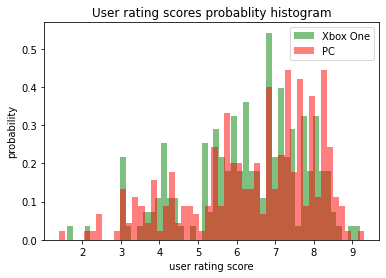

In [75]:


# selecting relevant data sclices 

xbox_one_ratings = games_filtered.loc[games_filtered.platform == 'XOne', 'user_score']
pc_ratings = games_filtered.loc[games_filtered.platform == 'PC', 'user_score']


# plotting probablity histograms to see what kind of distribution these platforms have

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

plt.hist(xbox_one_ratings, **kwargs, color ='g', label = 'Xbox One')
plt.hist(pc_ratings, **kwargs, color = 'r', label ='PC')
plt.gca().set(title = 'User rating scores probablity histogram', 
              ylabel = 'probability', xlabel ='user rating score')
plt.legend()
plt.show()


In [76]:
# looking at the distribution of user rating values within two plafroms

xbox_one_ratings.describe()


count    182.000000
mean       6.302582
std        1.506695
min        1.600000
25%        5.500000
50%        6.600000
75%        7.400000
max        9.200000
Name: user_score, dtype: float64

In [77]:
pc_ratings.describe()

count    285.000000
mean       6.415754
std        1.654620
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

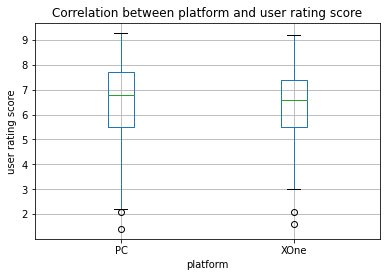

In [78]:
# plotting a boxplot with whiskers to find outliers

games_filtered.query('platform == "XOne" or platform == "PC"').boxplot(column = 'user_score', by = 'platform', return_type = 'axes')
plt.title ("Correlation between platform and user rating score")
plt.suptitle("")
plt.xlabel("platform")
plt.ylabel("user rating score")
plt.show()


- Outliers for PC values under 2.2 user score
- Outliers for Xbox one values under 3 user score

In [79]:

# slicing the dataset from outliers 
filtered_pc = games_filtered.query('platform == "PC" and user_score > 2.2')
filtered_xone = games_filtered.query('platform == "XOne" and user_score > 3')

# creating subsets for hypothesis testing

xbox_one_ratings_filtered = filtered_xone['user_score']
pc_ratings_filtered = filtered_pc['user_score']


Testing hypothesis that the average user rating within the Xbox one and PC platforms are the same.

- H0 is "sample distributions are equal" i.e. distributions of user rating score of two platforms.
- H1 is "sample distributions are not equal"

alpha = 0.05 as standrad in order not to do Error Type I or Error Type II  

In [80]:
# comparing samples
stat, p = mannwhitneyu(xbox_one_ratings_filtered, pc_ratings_filtered)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=23596.000, p=0.13972
Same distribution (fail to reject H0)


So, the hypothesis test result is that we cannot reject the H0 hypothesis, which is, in our case, "sample distributions are equal", i.e. the average values are also equal. 

#### "Average user ratings for the Action and Sports genres are different"

In [81]:
games_filtered['genre'].unique()

array(['Action', 'Shooter', 'Racing', 'Platform', 'Misc', 'Simulation',
       'Role-Playing', 'Sports', 'Adventure', 'Fighting', 'Strategy',
       'Puzzle'], dtype=object)

#### Preliminary studying of distribution of user rating  within two genres

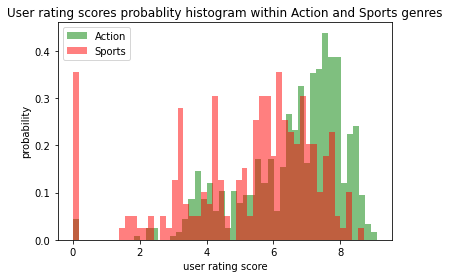

In [82]:

# selecting relevant data sclices 

action_ratings = games_filtered.loc[games_filtered.genre == 'Action', 'user_score']
sports_ratings = games_filtered.loc[games_filtered.genre == 'Sports', 'user_score']


# plotting probablity histograms to see what kind of distribution these platforms have

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)

plt.hist(action_ratings, **kwargs, color ='g', label = 'Action')
plt.hist(sports_ratings, **kwargs, color = 'r', label ='Sports')
plt.gca().set(title = 'User rating scores probablity histogram within Action and Sports genres', 
              ylabel = 'probability', xlabel ='user rating score')
plt.legend()
plt.show()

In [83]:
# looking at the distribution of user rating values within two genres

action_ratings.describe()


count    639.000000
mean       6.568075
std        1.574989
min        0.000000
25%        5.700000
50%        7.000000
75%        7.700000
max        9.100000
Name: user_score, dtype: float64

In [84]:
sports_ratings.describe()


count    226.000000
mean       5.261681
std        2.060235
min        0.000000
25%        4.200000
50%        5.800000
75%        6.700000
max        8.700000
Name: user_score, dtype: float64

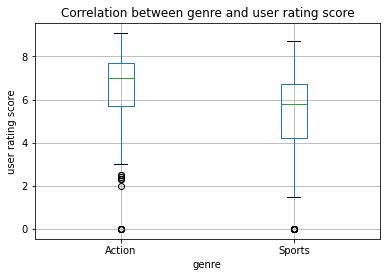

In [85]:
# plotting a boxplot with whiskers to find outliers

games_filtered.query('genre == "Sports" or genre == "Action"').boxplot(column = 'user_score', by = 'genre', return_type = 'axes')
plt.title ("Correlation between genre and user rating score")
plt.suptitle("")
plt.xlabel("genre")
plt.ylabel("user rating score")
plt.show()

 - For 'Action' outliers are values under 2.7 score 
 - For 'Sports' outliers are values under 0.45 score

In [86]:

# slicing the dataset from outliers 
filtered_action = games_filtered.query('genre == "Action" and user_score > 2.7')
filtered_sports = games_filtered.query('genre == "Sports" and user_score > 0.45')

# creating subsets for hypothesis testing

action_ratings_filtered = filtered_action['user_score']
sports_ratings_filtered = filtered_sports['user_score']

Testing hypothesis that the average user rating within Action and Sports platforms are different.

- H0 is "sample distributions are equal" i.e. distributions of user rating scores within two genres.
- H1 is "sample distributions are not equal"

alpha = 0.05  as standrad in order not to do Error Type I or Error Type II

In [87]:
# comparing samples
stat, p = mannwhitneyu(action_ratings_filtered, sports_ratings_filtered)
print('Statistics=%.3f, p=%.5f' % (stat, p))


# interpretating
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=39960.500, p=0.00000
Different distribution (reject H0)


The hypothesis test result is that we should reject the H0 hypothesis, which is, in our case, "sample distributions are equal", i.e. the average values are also equal. So we cannot reject the alternate hypothesis, that they are different, and the average user rating scores are also different.

### Conclusion

We have tested two hypotheses:

1) Average user ratings of the Xbox One and PC platforms are the same. 
2) Average user ratings for the Action and Sports genres are different.


A. First hypothesis 

To test the first hypothesis we made some preliminary analysis of distribution of user rating score values within these two group of users.

We found that values varied a lot within two samples. We plotted probabilty histograms in order to see better what the distribution looked like. We saw that the distribution of values in these cases was not  'normal': there are many peaks across the all the scores. This quite predictable because we talk about different games, so it is normal that they have different user rating scores and users do not prefer to schoose the only one.
So we decided to use the Mann-Whitney U test which seemed to be more approriate, because it is designed to be used in the case of any kind of distributions. The 'idea' of the test is to valuate the probabilty that the two datasets are taken from the one statistical population. The test enables to compare data samples and gives a suggestion whether we may reject the hypothesis that data samples distributions are the same (and taken from the same statistical population). Taking into account that if the distributions are the same, so the average of values should be the same as well, so we may use this test to test hypothesis as if an average of values related to one statictical population differs from another.
For alpha value we choosed a standard "0.05" in order not to do error type I and error type II. 

In accordance with the rules of the test we formulated H0 hypothesis as "the distributions of the data samples are the same" and H1 is "the distributions of the data samples are not the same". So if the test suggests not to reject the H0 hypothesis, we may further consider this hypothesis as likely possible.

As there were outliers within two samples  we decided first to remove the outliers and then make the test We determined the outliers with IQR method (outliers were set for PC user score values under 2.2 and user score and for Xbox one user score values under 3).

The P-value received was p=0.13972, so the result of the test was that we cannot reject the H0 hypothesis, i.e. the the data samples are the same, and therefore the average user score are the same. 


B. Second hypothesis

We also made some preliminary research of user rating score distributions within two samples.
As with the above, we decided to use the Mann-Whitney U test as the distributions of the values of selected data samples were  not also 'normal'. The logic was the same as above: we test hypothesis, that the distributions of data samples are equal, and if test suggests to reject this hypothesis, and not to reject the alternate hypothesis (that the distribution is different, and thefore the average is likely to be different). So H0 hypothesis was formulated in the same manner: 'distributions of the data samples are the same", and the H1: "the distributions of the data samples are not the same". For tha alpha was chosen the standard threshold - "0.05". 

We also removed the outliers before making the test (for 'Action' genre these were those lower  2.7 score,  for 'Sports' genre these were those lower 0.45 score). 

We conducted the test and we received p-value equal 0, so  this result meant that we should reject H0 hypothesis and has no ground to reject the alternate hypothesis, i.e. the samples are different, so average user rating score are also different. 


## General conclusion

I. INTRODUCTION

We have been given data on games market for 2016. More precisely it is information on user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales.
The goal of this research is to indetify patterns determine whether a game succeeds or not. The result of this study will allow Ice to spot potential big winners and plan advertising campaigns.

The dataset had 16715 entries containing the information on: 

1. Game's name ('Name');
2. Platform on which this game is released ('Platform');
3. Year of game's release ('Year_of_Release');
4. Games' genre ('Genre');
5. North American sales in USD million ('NA_sales');
6. Sales in Europe in USD million ('EU_sales');
7. Sales in Japan in USD million ('JP_sales');
8. Sales in other countries in USD million ('Other_sales');
9. Critics' score (maximun of 100) ('Critic_Score');
10. Users's score (maximum of 10) ('User_Score'); 
11. ESRB's rating ('Rating').


II. PREPROCESSING

At the first step we converted the names of the columns in the initial dataset by lowering all the letters. We did so in order to facilitate the further prepocessing and processing of the data. 

B.Missing values. 

As we discovered at the first look at the data there were many missing values:

- game's name ('name'), there are two rows with missing values;
- year of game's release ('year_of_release'), there are 269 rows with missing values (2%);
- games' genre ('genre'), there are two rows with missing values;
- critics' score ('critic_Score'), there are 8578 rows with missing values (51%);
- user's score ('user_Score'), there are 6701 rows with missing values (40%);
- ESRB's rating ('rating'), there are 6766 rows with missing values (40%). 

But as it was possible that there were any other issues with the values in these columns and other columns, we checked the content of  all of the columns by retreiving their unique values, counting the number of each value and examining possible correlation between the fact the values are missing with other facts of missing values. 

Here are details of what we found: 


1. 'name' (game's name)

We found nothing extraordinary with the values of this column except two rows with  missing values in this column, which are also the two rows with missing values in the column 'genre'. It is unclear Why these values are  missing values, but we may guess, that the reason is inaccurate data collection: may be there were issues in merging different data sources. The data seems to be totally corrupted (there are also missing values in other columns, so it was impossible to restore the names by any way. So taking into account the volume of the missing values we decided to drop these rows in order to clean the data. 

2. 'platform' (game's platform) and 'genre' (game's genre)

We found nothing problematic with the values of these columns, after we dropped the rows with missing values in 'name' we also dropped the rows with missing values in 'genre', so there were no missing values. 

3. 'na_sales' (sales in the Northen America),'eu_sales'(sales in Europe), 'jp_sales' (sales in Japan), 'other_sales' (sales in other countries)

We found that there were no issue with the data in these columns. But at the same time, there are many 0 values in these columns, so we checked if there are correlation between 0 value in one of these columns with 0 values on another column. We found that there was no correlation: 0 value in one column does not correspond to 0 values in others. So the data seem to be accurate. 

4. 'critic_score'(expert score), 'user_score' (users rating score), 'rating' (ESRB rating)

We found in the column 'user_score' there were many values equal to 'tbd', which is a common abbreviation for 'to be determined', so these values are also missing as many other in this column and two other columns: 'critic_score' and 'rating'. The reason of values missing may lie in the inaccurate data collection (the data was not updated or the data source used were not of high quality). We cannot restore this information based on other values: ESRB rating, user and critic ratings are very special do not correspond to the other parameters. The only way to restore the data is to use the other source. 

5. 'year_of_release' 

Like the above mentioned 'critic_score', 'user_score' and 'rating' this column contained missing values and  there was no correlation of missing values in this column and the missing values in other columns. 
It seems that the values in this column were missing due to the same reasons, as the other values were missing: unproper data collection. 

We then found an external source of raw data: a dataset which contained information on 474415 games with regard to Metacritic score ('metacritic'), RAWG users score ('user_rating'), year of release ('release_year') and ESRB rating. The first two parameters correspond to the 'critic_score and 'user_score' values: they have the same type of scores, so we assumed that in the initial dataset the same sources were used. Taking into account this assumption we merged two datasets and then we filled in a part of missing values with the values of the external dataset. it was necessary to make some other preprocessing: we deleted the rows with the values in the column 'year_of_release' exceeding 2016. These games were included in the initial dataset by mistake or the data in the external dataset were inaccurate with regard to the dates of release. 

Finally, we dropped the missing values and we got a dataset containing 8026 rows, so we loosed more than 16713 rows, but it was necessary to do so, because the rows with missing values were useless. 


C. Converting values to appropriate data types. 

We converted the values related to year of release('year_of_release') and critic score to integer type, as there could be only integer numbers in these columns, and the values related to users rating score ('user_score') to float type, as it these values were float type numbers, not 'Object' as were detected by Pandas. 

D. Duplicates. 

We found no duplicates. 

E. Calculating total sales for each game.

After finishing the preprocessing we calculated the total sales as the sum of the values of each of the columns containing the values related of sales and stored these values in a column 'total_sales'

III. DATA ANALYSIS

A. Released games number distribution throughout the years
We have found that the most of the games were released between 2000 and 2016 period and the most productive period was period from 2002 to 2011. After 2011 the number of games released per year constantly decreased.

B. Total games sales via platforms.

We see that total sales of games within different platforms varied significantly. There are 4 platforms (PS2, X360, PS3, Wii) that are big leaders and two smaller leaders (DS and PS4) in total sales if we calculate sales for all years. The others are outsiders compare to the said leaders. The fact that these platforms are leaders in total sales do not let us say that these platforms continue to grow in terms of sales.

We choosed the leaders in sales (the platforms DS, Wii, PS3, X360, PS2, PS4) and builded a plot to see how total sales via those platforms varied through the years. We found all of the leaders showed 0 sales for the gamees released in recent years. The only exception is PS4 platform. The reason is that it is quite new platform, so in 2016 it did not fade away.

We found that it takes generally 5-6 years for new platform to appear and fade away, there are platforms which remained longtime in the market (such as PS3 and X360), but it's more an exclusion.
That's why we have decided that for our further analysis we should take a period from 2011 to 2016.

C. Growing and shrinking platforms

We have found, that all of the platforms are shrinking, especially after 2015, but XOne, PS4 are not already zero, they still can bring sales, as they remain relatively popular, also we see that PC platform remains to bring more than zero as well.

D. Global sales of games split by platforms

We have builded boxplots to see how sales of all games were distributed via the platforms and found that:
1) there is a group of leaders (3DS, PS3, PS4, WiiU, X360 and XOne), whose median sales are higher than 0 and around 0.5 million USD. 
2) the median sales of other platforms are close to 0.

In the both groups there are platforms with a lot amount of outliers above the top threshold(such as PC, 3DS).

E. User rating score and expet review scores and sales

We builded scatter plots and calculated Pearson correlation coefficients to find out if there is a correlation between user rating scores and expert review scores and sales of games.

We have first examined this question with regard PS 4, and then with regard all the platforms. The fundings were the same.

We have found that the correlation is not significant in both cases, but in the case of expert review score is greater but we see that generally a game should have a good expert review scores in order to bring a lot of revenue. But th opposite is not true. A game might have a good expert review score score, but may be not successful in terms of revenue. The correlation between user rating score and total sales is even a little bit less significant: there are games which do not have good scores, but are good in sales.


F. Genres, distribution of number of games within the genres, distribution of sales within the genres.

We have found that the most popular genres were Action, Shooter, Sports, Role-Playing, Racing, together they made more than a half of all games.

The top five most profitable in terms of average sales were:
- Shooter (1.3 Million USD),
- Platform (0.9 Million USD),
- Sports (0.8 Million USD),
- Misc (0.723 Million USD),
- Action (0.721 Million USD). 

So three of the most popular genres are the same tume the most profitable if we take into account average sales. But Platform and Misc are not very popular in terms of number of released games, but they are the most profitable. The genre Puzzle is in the end of two lists: it is the most unpopular game and the lowest profitable in terms of average sales (0.24 Million USD).

The other low profitable game genres are:
- Adventure (0.26 Million USD),
- Strategy (0.31 Million USD),
- Fighting (0.45 Million USD).
At the same time, as we see from the boxplots, almost in any genre there are high revenue outliers which affect the average sales.

So if we compare the genres with regard to median sales the top five most profitable genres would be:

- Shooter (0.52 Million USD),
- Sports (0.43 Million USD),
- Misc (0.33 Million USD),
- Fighting (0.3 Million USD),
- Action (0.27 Million USD).

At the same time, as we see from the boxplots, almost in any genre there are high revenue outliers which affect the average sales. 

So if we compare the genres with regard to median sales the top five most profitable genres would be: 
- Shooter (0.52 Million USD), 
- Sports (0.43 Million USD), 
- Misc (0.33 Million USD), 
- Fighting (0.3 Million USD), 
- Action (0.27 Million USD). 

So the genre Platform is not in the list, while Fighting is. 

The list of low profitable genres in terms of median sales is also a little different: 
- Strategy(0.205 Million USD), 
- Simulation(0.19 Million USD), 
- Puzzle (0.1 Million USD), 
- Adventure(0.09 Million USD). 

So the Puzzle is not at the end, and Fighting is replaced by Simulation.


Summing up two fundings we may figure out, that: 

1) the high profitable genres were 
- Shooter,
- Sports, 
- Misc,
- Action 

which are leaders in terms average and median sales. 

2) the low profitable genres were 
- Strategy, 
- Puzzle, and 
- Adventure 
which are outsiders in terms averages and median sales.

IV. USER PROFILE FOR EACH REGION

We studied user preferences with regard three parameters: preferred platforms, preferred genres and correlation with ESRB rating and sales

A. Platforms.

We found top five platforms for each regions in terms of their market share. 

The top five platforms in Europe are: 

- PS3	(market share is 0.26)
- PS4	(market share is 0.21)
- X360	(market share is 0.19)
- PC	(market share is 0.09)
- XOne	(market share is 0.07)

The top five platforms in Japan are: 

- 3DS	(market share is 0.34)
- PS3	(market share is 0.29)
- PS4	(market share is 0.09)
- WiiU  (market share is 0.09)
- PSV	(market share is 0.07)

The top five platforms in the Northen America are: 
    
- X360 (market share is 0.29)
- PS3  (market share is 0.21)
- PS4  (market share is 0.13)
- XOne (market share is 0.11)
- 3DS  (market share is 0.07)

The only two platforms are commun for all three markets: PS3 and PS4. In Europe and in the Northen America there are also two other common leader platforms - X360 (top platform in the Northen America and the third in Europe) and XOne (the fourth place in the Northen America and the fifth place in Europe). 

Japan and the Northen America markets also have common leader: 3DS (the fifth place in the Northen America and the first(!) in Japan). 

On japanese market there are also leaders two other platforms (WiiU and PSV), which are not listed in other to charts. 

In other hand, in Europe there are also some specific leader: PC which is not leading in other markets. 

B. Top  genres

We did the same thing with genres. 

Top five genres in Europe:

- Action	   (market share is 0.32)
- Shooter	   (market share is 0.23)
- Sports	   (market share is 0.13)
- Role-Playing (market share is 0.08)
- Racing	   (market share is 0.06)

Top five genres in the Northen America:

- Action	    (market share is 0.29)
- Shooter	    (market share is 0.25)
- Sports	    (market share is 0.13)
- Role-Playing	(market share is 0.08)
- Misc	        (market share is 0.05)

Top five genres in Japan:

- Action	    (market share is 0.26)
- Role-Playing	(market share is 0.22)
- Platform	    (market share is 0.10)
- Shooter	    (market share is 0.09)
- Simulation	(market share is 0.08)

The european and northen american markets look very close to each other in terms of genres the first 4 top genres are the same, at the fifth place there is different genre: "Racing" in in Europe and "Misc" in the Northen America.
In Japan the situation differs. The leader is also "Action", there are also "Role-Playing" and "Shooter", as in Europe and the Northen America, but in Japan are also profitable "Platform" and "Simulation". Moreover, it's worth noticing that Role-Playing is at second place in this market, the place taken by "Shooter" in two others. 

C. ESRB rating and sales

We also calculated the market share of games with different ESRB rating. 

We see that in Europe and in the Northen America, the biggest martket share is for games with ESRB rating "Mature", followed by "Everyone" and "Teen". In Japan it is different: first goes "Everyone" category, then "Teen" and only on the third place is "Mature". We may conclude that in Japan ESRB rating is more important for sales than in Europe and the Northen America where games with the most restrictive rating have the biggest market share.

V. HYPOTHESES TESTING

We have tested two hypotheses:

1) Average user ratings of the Xbox One and PC platforms are the same. 
2) Average user ratings for the Action and Sports genres are different.

A. First hypothesis 

To test the first hypothesis we made some preliminary analysis of distribution of user rating score values within these two group of users.

We found that values varied a lot within two samples. We plotted probabilty histograms in order to see better what the distribution looked like. We saw that the distribution of values in these cases was not  'normal': there are many peaks across the all the scores. This quite predictable because we talk about different games, so it is normal that they have different user rating scores and users do not prefer to schoose the only one.
So we decided to use the Mann-Whitney U test which seemed to be more approriate, because it is designed to be used in the case of any kind of distributions. The 'idea' of the test is to valuate the probabilty that the two datasets are taken from the one statistical population. The test enables to compare data samples and gives a suggestion whether we may reject the hypothesis that data samples distributions are the same (and taken from the same statistical population). Taking into account that if the distributions are the same, so the average of values should be the same as well, so we may use this test to test hypothesis as if an average of values related to one statictical population differs from another.
For alpha value we choosed a standard "0.05" in order not to do error type I and error type II. 

In accordance with the rules of the test we formulated H0 hypothesis as "the distributions of the data samples are the same" and H1 is "the distributions of the data samples are not the same". So if the test suggests not to reject the H0 hypothesis, we may further consider this hypothesis as likely possible.

As there were outliers within two samples  we decided first to remove the outliers and then make the test We determined the outliers with IQR method (outliers were set for PC user score values under 2.2 and user score and for Xbox one user score values under 3).

The P-value received was p=0.13972, so the result of the test was that we cannot reject the H0 hypothesis, i.e. the the data samples are the same, and therefore the average user score are the same. 


B. Second hypothesis

We also made some preliminary research of user rating score distributions within two samples.
As with the above, we decided to use the Mann-Whitney U test as the distributions of the values of selected data samples were  not also 'normal'. The logic was the same as above: we test hypothesis, that the distributions of data samples are equal, and if test suggests to reject this hypothesis, and not to reject the alternate hypothesis (that the distribution is different, and thefore the average is likely to be different). So H0 hypothesis was formulated in the same manner: 'distributions of the data samples are the same", and the H1: "the distributions of the data samples are not the same". For tha alpha was chosen the standard threshold - "0.05". 

We also removed the outliers before making the test (for 'Action' genre these were those lower  2.7 score,  for 'Sports' genre these were those lower 0.45 score). 

We conducted the test and we received p-value equal 0, so  this result meant that we should reject H0 hypothesis and has no ground to reject the alternate hypothesis, i.e. the samples are different, so average user rating score are also different. 